Notebook for us to start working in. 

# PPOL 5203 Final Project

## 1. Import Data and Clean Columns

In [2]:
#!pip install openpyxl

In [3]:
import pandas as pd
import os
import openpyxl

In [9]:
pwd

'/Users/katharynloweth/Desktop/Data_Science_I_Fall2023/PPOL5203_FinalProject'

In [8]:
#changing path so that we can open files from the orig_data folder
#KL: when i re-run code i keep getting errors when we start to switch directories. Can we work from the main 
#final project folder and code the file paths from there?



os.chdir("../")
#os.chdir('Datasets/Orig_Data')
#os.chdir('PPOL5203_FinalProject')

In [10]:
# import County Health Data

countyhealthcols_1 = ['FIPS', 'State', 'County', 'Life Expectancy', 'Age-Adjusted Death Rate', '% Frequent Physical Distress', '% Frequent Mental Distress', 
                 'Population','% Less than 18 Years of Age','% 65 and Over','% American Indian or Alaska Native','% Asian','% Native Hawaiian or Other Pacific Islander','% Hispanic','% Non-Hispanic White','% Not Proficient in English','% Female','% Rural']

#KL : do we want to group all non-white demographic groups together as "nonwhite"?

County_Health_xl = pd.read_excel("Datasets/Orig_Data/2023_County_Health_Rankings_Data.xlsx", sheet_name = ['Additional Measure Data'],skiprows = 1, usecols = countyhealthcols_1)

#'% Non-Hispanic Black' couldn't find this one to add as a column

In [11]:
# subset the dictionary provided by the sheet needed and save as a new dataframe
County_Health_Addl_Measures = County_Health_xl['Additional Measure Data']

In [12]:
County_Health_Addl_Measures.rename(columns=lambda x: x.replace(" ", "_").replace("%", "Percent"), inplace=True)

In [13]:
County_Health_Addl_Measures.head()

FIPS    State   County  Life_Expectancy  Age-Adjusted_Death_Rate  \
0  1000  Alabama      NaN        74.835949               499.868550   
1  1001  Alabama  Autauga        76.585650               427.073326   
2  1003  Alabama  Baldwin        77.724729               381.702031   
3  1005  Alabama  Barbour        72.867210               589.566095   
4  1007  Alabama     Bibb        73.609363               567.508146   

   Percent_Frequent_Physical_Distress  Percent_Frequent_Mental_Distress  \
0                           11.077397                         16.484296   
1                           10.700000                         16.200000   
2                            9.900000                         16.100000   
3                           14.900000                         18.000000   
4                           12.700000                         17.400000   

   Population  Percent_Less_than_18_Years_of_Age  Percent_65_and_Over  \
0     5039877                          22.267448            17.635688   
1       59095                          23.406380            16.048735   
2      239294                          21.218250            21.469824   
3       24964                          20.549591            19.976767   
4       22477                          20.118343            16.737109   

   Percent_American_Indian_or_Alaska_Native  Percent_Asian  \
0                                  0.714442       1.550435   
1                                  0.458584       1.203147   
2                                  0.800271       1.122469   
3                                  0.725044       0.460663   
4                                  0.502736       0.275838   

   Percent_Native_Hawaiian_or_Other_Pacific_Islander  Percent_Hispanic  \
0                                           0.108832          4.785196   
1                                           0.118453          3.326847   
2                                           0.068535          4.841743   
3                                           0.232335          4.959141   
4                                           0.129021          3.087601   

   Percent_Non-Hispanic_White  Percent_Not_Proficient_in_English  \
0                   64.877099                           1.027596   
1                   72.454522                           0.231241   
2                   83.148763                           0.759661   
3                   45.305240                           1.382681   
4                   73.564088                           0.443062   

   Percent_Female  Percent_Rural  
0       51.425422      40.963183  
1       51.378289      42.002162  
2       51.347715      42.279099  
3       46.703253      67.789635  
4       46.015927      68.352607

In [14]:
countyhealthcols_2 = ['FIPS','% Fair or Poor Health', 'Average Number of Physically Unhealthy Days', 'Average Number of Mentally Unhealthy Days', '# Primary Care Physicians','Primary Care Physicians Rate',
                 'Primary Care Physicians Ratio', '# Dentists', 'Dentist Rate','Dentist Ratio', 'Average Daily PM2.5', 'Presence of Water Violation', '# Mental Health Providers','Mental Health Provider Rate','Mental Health Provider Ratio']

County_Health_xl_ranked_data = pd.read_excel("Datasets/Orig_Data/2023_County_Health_Rankings_Data.xlsx", sheet_name = ['Ranked Measure Data'],skiprows = 1, usecols = countyhealthcols_2)




In [15]:
# subset the dictionary provided by the sheet needed and save as a new dataframe
County_Health_Ranked_Measures = County_Health_xl_ranked_data['Ranked Measure Data']

In [16]:
# clean column names
County_Health_Ranked_Measures.rename(columns=lambda x: x.replace(" ", "_").replace("%", "Percent").replace("#", "Number"), inplace=True)

# Do we want to convert percents to decimals?
# Do we want the ratios for dentist, primary care, mental health? 

In [17]:
County_Health_Ranked_Measures.head()

FIPS  Percent_Fair_or_Poor_Health  \
0  1000                         18.9   
1  1001                         16.9   
2  1003                         14.9   
3  1005                         27.5   
4  1007                         21.6   

   Average_Number_of_Physically_Unhealthy_Days  \
0                                     3.482416   
1                                     3.432211   
2                                     3.276177   
3                                     4.605432   
4                                     4.012182   

   Average_Number_of_Mentally_Unhealthy_Days  Number_Primary_Care_Physicians  \
0                                   5.073277                          3238.0   
1                                   4.797351                            25.0   
2                                   4.753750                           150.0   
3                                   4.954855                             8.0   
4                                   5.364779                            14.0   

   Primary_Care_Physicians_Rate Primary_Care_Physicians_Ratio  \
0                      65.79252                        1520:1   
1                      44.52756                        2246:1   
2                      65.42019                        1529:1   
3                      32.53487                        3074:1   
4                      63.24539                        1581:1   

   Number_Dentists  Dentist_Rate Dentist_Ratio  \
0           2454.0      48.69166        2054:1   
1             19.0      32.15162        3110:1   
2            114.0      47.64014        2099:1   
3              8.0      32.04615        3121:1   
4              6.0      26.69395        3746:1   

   Number_Mental_Health_Providers  Mental_Health_Provider_Rate  \
0                          6321.0                    125.41973   
1                            21.0                     35.53600   
2                           250.0                    104.47399   
3                             6.0                     24.03461   
4                             9.0                     40.04093   

  Mental_Health_Provider_Ratio  Average_Daily_PM2.5  \
0                        797:1                  9.3   
1                       2814:1                 10.0   
2                        957:1                  7.6   
3                       4161:1                  9.4   
4                       2497:1                  9.8   

  Presence_of_Water_Violation  
0                         NaN  
1                          No  
2                         Yes  
3                         Yes  
4                          No

In [18]:
#import NRI data 

NRIcols = ['STATE', 'STATEABBRV', 'COUNTY','STCOFIPS', 'POPULATION','AREA',
           'RISK_SCORE','RISK_RATNG','EAL_SCORE','EAL_RATNG','SOVI_SCORE','SOVI_RATNG','RESL_SCORE','RESL_RATNG']

NRI_df = pd.read_csv("Datasets/Orig_Data/NRI_Table_Counties/NRI_Table_Counties.csv", usecols = NRIcols)

In [19]:
NRI_df.rename(columns = {'STCOFIPS': 'FIPS'}, inplace = True)

In [20]:
NRI_df.head()

STATE STATEABBRV   COUNTY  FIPS  POPULATION         AREA  RISK_SCORE  \
0  Alabama         AL  Autauga  1001       58764   610.470508   49.220490   
1  Alabama         AL  Baldwin  1003      231365  2047.738775   97.709195   
2  Alabama         AL  Barbour  1005       25160   913.646511   56.188355   
3  Alabama         AL     Bibb  1007       22239   632.486798   32.484887   
4  Alabama         AL   Blount  1009       58992   657.196555   65.128858   

        RISK_RATNG  EAL_SCORE        EAL_RATNG  SOVI_SCORE  \
0   Relatively Low  50.943980         Very Low   51.299999   
1  Relatively High  98.235840  Relatively High   31.030001   
2   Relatively Low  44.877747         Very Low   99.269997   
3         Very Low  30.485918         Very Low   80.779999   
4   Relatively Low  63.633550   Relatively Low   51.369999   

            SOVI_RATNG  RESL_SCORE           RESL_RATNG  
0  Relatively Moderate   51.810001  Relatively Moderate  
1       Relatively Low   86.120003            Very High  
2            Very High    6.240000             Very Low  
3            Very High   19.730000             Very Low  
4  Relatively Moderate   22.820000       Relatively Low

In [21]:
#os.chdir('../')


In [22]:
pwd


'/Users/katharynloweth/Desktop/Data_Science_I_Fall2023/PPOL5203_FinalProject'

In [23]:
#import Places data 

PlacesCols = ['StateAbbr', 'StateDesc', 'LocationName', 'LocationID', 'Geolocation']


Places_df = pd.read_csv("Datasets/Orig_Data/PLACES__Local_Data_for_Better_Health__County_Data_2023_release.csv", usecols = PlacesCols)


In [24]:
#I moved this code later on so that it is in the final dataset
#Places_df['County_State'] = Places_df.LocationName + ", " + Places_df.StateAbbr

In [25]:
Places_df.head()

StateAbbr StateDesc LocationName  LocationID                     Geolocation
0        GA   Georgia         Ware       13299   POINT (-82.4215072 31.050881)
1        IN   Indiana         Ohio       18115   POINT (-84.9642994 38.940527)
2        IN   Indiana         Owen       18119  POINT (-86.8388453 39.3173394)
3        IA      Iowa         Iowa       19095  POINT (-92.0591226 41.6839184)
4        IA      Iowa       Marion       19125  POINT (-93.0938678 41.3314327)

In [26]:
# Create a new column for the county and state so that we can merge later
# Confirm - this data set does not include FIPS?
#KL -changing group to group by the FIPS (in this case called LocationID)
Places_df_grouped = pd.DataFrame(Places_df.groupby('LocationID', as_index = False)['Geolocation'].first())
Places_df_grouped.head()

LocationID                     Geolocation
0          59                            None
1        1001  POINT (-86.6464395 32.5322367)
2        1003  POINT (-87.7460666 30.6592183)
3        1005  POINT (-85.4051035 31.8702531)
4        1007  POINT (-87.1271475 33.0158929)

## 2. Merge Datasets together by FIPS

In [27]:
# To see which data set has the most information on FIPS

print( NRI_df.shape)
print( County_Health_Ranked_Measures.shape)
print( County_Health_Addl_Measures.shape)
print( Places_df_grouped.shape)

(3231, 14)
(3193, 15)
(3193, 18)
(3144, 2)


In [28]:
# Do we want to join on the left or outer? Outer would mean that we don't have data for NRI for those FIPS that are coming from the county health data

Merged_County_Data_Ranked = pd.merge(NRI_df, County_Health_Ranked_Measures, how = 'left', on = 'FIPS')

In [29]:
Merged_County_Data_Ranked.shape

(3231, 28)

In [30]:
Merged_County_Data_Ranked.head()

STATE STATEABBRV   COUNTY  FIPS  POPULATION         AREA  RISK_SCORE  \
0  Alabama         AL  Autauga  1001       58764   610.470508   49.220490   
1  Alabama         AL  Baldwin  1003      231365  2047.738775   97.709195   
2  Alabama         AL  Barbour  1005       25160   913.646511   56.188355   
3  Alabama         AL     Bibb  1007       22239   632.486798   32.484887   
4  Alabama         AL   Blount  1009       58992   657.196555   65.128858   

        RISK_RATNG  EAL_SCORE        EAL_RATNG  ...  \
0   Relatively Low  50.943980         Very Low  ...   
1  Relatively High  98.235840  Relatively High  ...   
2   Relatively Low  44.877747         Very Low  ...   
3         Very Low  30.485918         Very Low  ...   
4   Relatively Low  63.633550   Relatively Low  ...   

   Primary_Care_Physicians_Rate Primary_Care_Physicians_Ratio  \
0                      44.52756                        2246:1   
1                      65.42019                        1529:1   
2                      32.53487                        3074:1   
3                      63.24539                        1581:1   
4                      20.73291                        4823:1   

   Number_Dentists Dentist_Rate  Dentist_Ratio  \
0             19.0     32.15162         3110:1   
1            114.0     47.64014         2099:1   
2              8.0     32.04615         3121:1   
3              6.0     26.69395         3746:1   
4             10.0     16.93738         5904:1   

   Number_Mental_Health_Providers  Mental_Health_Provider_Rate  \
0                            21.0                     35.53600   
1                           250.0                    104.47399   
2                             6.0                     24.03461   
3                             9.0                     40.04093   
4                            12.0                     20.32486   

   Mental_Health_Provider_Ratio  Average_Daily_PM2.5  \
0                        2814:1                 10.0   
1                         957:1                  7.6   
2                        4161:1                  9.4   
3                        2497:1                  9.8   
4                        4920:1                  9.6   

  Presence_of_Water_Violation  
0                          No  
1                         Yes  
2                         Yes  
3                          No  
4                          No  

[5 rows x 28 columns]

In [31]:
Merged_County_Data2 = pd.merge(NRI_df, County_Health_Ranked_Measures, how = 'outer', on = 'FIPS')
Merged_County_Data2.shape

(3283, 28)

In [32]:
# going with the left join for now

#merge the additional measures with the previously merged data set
Merged_County_Data_Addl_Measures = pd.merge(Merged_County_Data_Ranked, County_Health_Addl_Measures, how = 'left', on = 'FIPS')
Merged_County_Data_Addl_Measures.shape

(3231, 45)

In [33]:
Merged_County_Data = pd.merge(Merged_County_Data_Addl_Measures,
         Places_df_grouped,
         how="outer",
         left_on = "FIPS",  
         right_on="LocationID")

Merged_County_Data.head()

#print(Merged_County_Data.shape)

STATE STATEABBRV   COUNTY    FIPS  POPULATION         AREA  RISK_SCORE  \
0  Alabama         AL  Autauga  1001.0     58764.0   610.470508   49.220490   
1  Alabama         AL  Baldwin  1003.0    231365.0  2047.738775   97.709195   
2  Alabama         AL  Barbour  1005.0     25160.0   913.646511   56.188355   
3  Alabama         AL     Bibb  1007.0     22239.0   632.486798   32.484887   
4  Alabama         AL   Blount  1009.0     58992.0   657.196555   65.128858   

        RISK_RATNG  EAL_SCORE        EAL_RATNG  ...  \
0   Relatively Low  50.943980         Very Low  ...   
1  Relatively High  98.235840  Relatively High  ...   
2   Relatively Low  44.877747         Very Low  ...   
3         Very Low  30.485918         Very Low  ...   
4   Relatively Low  63.633550   Relatively Low  ...   

   Percent_American_Indian_or_Alaska_Native Percent_Asian  \
0                                  0.458584      1.203147   
1                                  0.800271      1.122469   
2                                  0.725044      0.460663   
3                                  0.502736      0.275838   
4                                  0.660558      0.403110   

   Percent_Native_Hawaiian_or_Other_Pacific_Islander Percent_Hispanic  \
0                                           0.118453         3.326847   
1                                           0.068535         4.841743   
2                                           0.232335         4.959141   
3                                           0.129021         3.087601   
4                                           0.123643         9.867719   

   Percent_Non-Hispanic_White  Percent_Not_Proficient_in_English  \
0                   72.454522                           0.231241   
1                   83.148763                           0.759661   
2                   45.305240                           1.382681   
3                   73.564088                           0.443062   
4                   86.329839                           1.726907   

   Percent_Female  Percent_Rural  LocationID                     Geolocation  
0       51.378289      42.002162      1001.0  POINT (-86.6464395 32.5322367)  
1       51.347715      42.279099      1003.0  POINT (-87.7460666 30.6592183)  
2       46.703253      67.789635      1005.0  POINT (-85.4051035 31.8702531)  
3       46.015927      68.352607      1007.0  POINT (-87.1271475 33.0158929)  
4       50.192239      89.951502      1009.0    POINT (-86.56644 33.9773575)  

[5 rows x 47 columns]

In [34]:
# create new column for County_State so that we can merge with the Places data set
#Merged_County_Data_Addl_Measures['County_State'] = Merged_County_Data_Addl_Measures['COUNTY'] + ", " + Merged_County_Data_Addl_Measures['STATEABBRV']

In [35]:
# merge the places data set with the rest of the data on the County_state variable
#Merged_County_Data = pd.merge(Merged_County_Data_Addl_Measures, Places_df_grouped, how = 'left', on = 'County_State')

In [36]:
Merged_County_Data['County_State'] = Merged_County_Data.COUNTY + ", " + Merged_County_Data.STATEABBRV

Merged_County_Data.head()

STATE STATEABBRV   COUNTY    FIPS  POPULATION         AREA  RISK_SCORE  \
0  Alabama         AL  Autauga  1001.0     58764.0   610.470508   49.220490   
1  Alabama         AL  Baldwin  1003.0    231365.0  2047.738775   97.709195   
2  Alabama         AL  Barbour  1005.0     25160.0   913.646511   56.188355   
3  Alabama         AL     Bibb  1007.0     22239.0   632.486798   32.484887   
4  Alabama         AL   Blount  1009.0     58992.0   657.196555   65.128858   

        RISK_RATNG  EAL_SCORE        EAL_RATNG  ...  Percent_Asian  \
0   Relatively Low  50.943980         Very Low  ...       1.203147   
1  Relatively High  98.235840  Relatively High  ...       1.122469   
2   Relatively Low  44.877747         Very Low  ...       0.460663   
3         Very Low  30.485918         Very Low  ...       0.275838   
4   Relatively Low  63.633550   Relatively Low  ...       0.403110   

  Percent_Native_Hawaiian_or_Other_Pacific_Islander  Percent_Hispanic  \
0                                          0.118453          3.326847   
1                                          0.068535          4.841743   
2                                          0.232335          4.959141   
3                                          0.129021          3.087601   
4                                          0.123643          9.867719   

  Percent_Non-Hispanic_White  Percent_Not_Proficient_in_English  \
0                  72.454522                           0.231241   
1                  83.148763                           0.759661   
2                  45.305240                           1.382681   
3                  73.564088                           0.443062   
4                  86.329839                           1.726907   

   Percent_Female  Percent_Rural  LocationID                     Geolocation  \
0       51.378289      42.002162      1001.0  POINT (-86.6464395 32.5322367)   
1       51.347715      42.279099      1003.0  POINT (-87.7460666 30.6592183)   
2       46.703253      67.789635      1005.0  POINT (-85.4051035 31.8702531)   
3       46.015927      68.352607      1007.0  POINT (-87.1271475 33.0158929)   
4       50.192239      89.951502      1009.0    POINT (-86.56644 33.9773575)   

  County_State  
0  Autauga, AL  
1  Baldwin, AL  
2  Barbour, AL  
3     Bibb, AL  
4   Blount, AL  

[5 rows x 48 columns]

In [37]:
Merged_County_Data.COUNTY.isna().value_counts()

Merged_County_Data[Merged_County_Data.COUNTY.isna()]

STATE STATEABBRV COUNTY  FIPS  POPULATION  AREA  RISK_SCORE RISK_RATNG  \
3231   NaN        NaN    NaN   NaN         NaN   NaN         NaN        NaN   

      EAL_SCORE EAL_RATNG  ...  Percent_Asian  \
3231        NaN       NaN  ...            NaN   

     Percent_Native_Hawaiian_or_Other_Pacific_Islander  Percent_Hispanic  \
3231                                               NaN               NaN   

     Percent_Non-Hispanic_White  Percent_Not_Proficient_in_English  \
3231                        NaN                                NaN   

      Percent_Female  Percent_Rural  LocationID  Geolocation County_State  
3231             NaN            NaN        59.0         None          NaN  

[1 rows x 48 columns]

In [38]:
Merged_County_Data.STATE.isna().value_counts()

STATE
False    3231
True        1
Name: count, dtype: int64

In [39]:
Merged_County_Data[Merged_County_Data.STATEABBRV == "AL"]

STATE STATEABBRV      COUNTY    FIPS  POPULATION         AREA  \
0   Alabama         AL     Autauga  1001.0     58764.0   610.470508   
1   Alabama         AL     Baldwin  1003.0    231365.0  2047.738775   
2   Alabama         AL     Barbour  1005.0     25160.0   913.646511   
3   Alabama         AL        Bibb  1007.0     22239.0   632.486798   
4   Alabama         AL      Blount  1009.0     58992.0   657.196555   
..      ...        ...         ...     ...         ...          ...   
62  Alabama         AL  Tuscaloosa  1125.0    226701.0  1364.876560   
63  Alabama         AL      Walker  1127.0     65276.0   813.321874   
64  Alabama         AL  Washington  1129.0     15333.0  1099.555462   
65  Alabama         AL      Wilcox  1131.0     10548.0   916.551772   
66  Alabama         AL     Winston  1133.0     23478.0   638.247221   

    RISK_SCORE           RISK_RATNG  EAL_SCORE            EAL_RATNG  ...  \
0    49.220490       Relatively Low  50.943980             Very Low  ...   
1    97.709195      Relatively High  98.235840      Relatively High  ...   
2    56.188355       Relatively Low  44.877747             Very Low  ...   
3    32.484887             Very Low  30.485918             Very Low  ...   
4    65.128858       Relatively Low  63.633550       Relatively Low  ...   
..         ...                  ...        ...                  ...  ...   
62   87.114222  Relatively Moderate  87.310430  Relatively Moderate  ...   
63   73.337576       Relatively Low  69.142680       Relatively Low  ...   
64   58.001909       Relatively Low  56.453110       Relatively Low  ...   
65   23.003500             Very Low  16.836893             Very Low  ...   
66   44.002545             Very Low  37.883008             Very Low  ...   

    Percent_Asian Percent_Native_Hawaiian_or_Other_Pacific_Islander  \
0        1.203147                                          0.118453   
1        1.122469                                          0.068535   
2        0.460663                                          0.232335   
3        0.275838                                          0.129021   
4        0.403110                                          0.123643   
..            ...                                               ...   
62       1.675279                                          0.068720   
63       0.518375                                          0.106452   
64       0.825246                                          0.138641   
65       0.268045                                          0.019146   
66       0.380518                                          0.207171   

    Percent_Hispanic Percent_Non-Hispanic_White  \
0           3.326847                  72.454522   
1           4.841743                  83.148763   
2           4.959141                  45.305240   
3           3.087601                  73.564088   
4           9.867719                  86.329839   
..               ...                        ...   
62          4.179607                  60.042201   
63          2.951341                  88.459996   
64          1.736317                  65.286855   
65          1.541260                  27.177867   
66          3.310502                  93.294436   

    Percent_Not_Proficient_in_English  Percent_Female  Percent_Rural  \
0                            0.231241       51.378289      42.002162   
1                            0.759661       51.347715      42.279099   
2                            1.382681       46.703253      67.789635   
3                            0.443062       46.015927      68.352607   
4                            1.726907       50.192239      89.951502   
..                                ...             ...            ...   
62                           0.867742       51.782104      25.508076   
63                           0.500041       51.005893      74.088000   
64                           0.013559       51.033208     100.000000   
65                           0.319872       52.919778 

In [40]:
# Remove duplicate state and county columns
Merged_County_Data.drop(columns = ['LocationID', 'COUNTY', 'STATE'], inplace = True)

Merged_County_Data.head()

STATEABBRV    FIPS  POPULATION         AREA  RISK_SCORE       RISK_RATNG  \
0         AL  1001.0     58764.0   610.470508   49.220490   Relatively Low   
1         AL  1003.0    231365.0  2047.738775   97.709195  Relatively High   
2         AL  1005.0     25160.0   913.646511   56.188355   Relatively Low   
3         AL  1007.0     22239.0   632.486798   32.484887         Very Low   
4         AL  1009.0     58992.0   657.196555   65.128858   Relatively Low   

   EAL_SCORE        EAL_RATNG  SOVI_SCORE           SOVI_RATNG  ...  \
0  50.943980         Very Low   51.299999  Relatively Moderate  ...   
1  98.235840  Relatively High   31.030001       Relatively Low  ...   
2  44.877747         Very Low   99.269997            Very High  ...   
3  30.485918         Very Low   80.779999            Very High  ...   
4  63.633550   Relatively Low   51.369999  Relatively Moderate  ...   

   Percent_American_Indian_or_Alaska_Native Percent_Asian  \
0                                  0.458584      1.203147   
1                                  0.800271      1.122469   
2                                  0.725044      0.460663   
3                                  0.502736      0.275838   
4                                  0.660558      0.403110   

   Percent_Native_Hawaiian_or_Other_Pacific_Islander  Percent_Hispanic  \
0                                           0.118453          3.326847   
1                                           0.068535          4.841743   
2                                           0.232335          4.959141   
3                                           0.129021          3.087601   
4                                           0.123643          9.867719   

   Percent_Non-Hispanic_White  Percent_Not_Proficient_in_English  \
0                   72.454522                           0.231241   
1                   83.148763                           0.759661   
2                   45.305240                           1.382681   
3                   73.564088                           0.443062   
4                   86.329839                           1.726907   

   Percent_Female Percent_Rural                     Geolocation  County_State  
0       51.378289     42.002162  POINT (-86.6464395 32.5322367)   Autauga, AL  
1       51.347715     42.279099  POINT (-87.7460666 30.6592183)   Baldwin, AL  
2       46.703253     67.789635  POINT (-85.4051035 31.8702531)   Barbour, AL  
3       46.015927     68.352607  POINT (-87.1271475 33.0158929)      Bibb, AL  
4       50.192239     89.951502    POINT (-86.56644 33.9773575)    Blount, AL  

[5 rows x 45 columns]

In [41]:
# create function to classify community type by population of county
# these thresholds come from the CDC urban rural classification report.

def community_type_classification(population):
    '''
    Add description here.
    '''
    if population < 50000:
        return("Rural")
    elif population < 1000000:
        return("Small/Medium Urban")
    else:
        return("Urban")

In [42]:
# create new column to get community type from the created classification function
Merged_County_Data['Community_Type'] = [community_type_classification(x) for x in Merged_County_Data['POPULATION']]

In [43]:
Merged_County_Data.Community_Type.value_counts()

# Looks like we don't have many urban observations - do we want to include medium in the urban classification?

#KL - if we do cutoff for urban as greater than 250,000 its roughly 250 for urban and 700 for small urban

Community_Type
Rural                 2227
Small/Medium Urban     955
Urban                   50
Name: count, dtype: int64

In [44]:
# Look at the number of NA geolocation rows
Merged_County_Data.Geolocation.isna().value_counts() #only 89 values that don't have geolocations - could be misspellings that we need to look at?

#KL - those with NaN's in the geolocation are US territories -- we can probably remove from the dataset as there is also little information about them in the NRI
Merged_County_Data[Merged_County_Data.Geolocation.isna()]


#removing NaNs for geolocation
Merged_County_Data_clean = Merged_County_Data[Merged_County_Data.Geolocation.isna() == False]

Merged_County_Data_clean.Geolocation.isna().value_counts()


Geolocation
False    3143
Name: count, dtype: int64

In [45]:
#confirming that all of the remaining datasets have information on NRI risk 
Merged_County_Data_clean.RISK_RATNG.value_counts()

RISK_RATNG
Very Low               1511
Relatively Low         1091
Relatively Moderate     397
Relatively High         129
Very High                15
Name: count, dtype: int64

In [46]:
# Final data set merged all data sets
Merged_County_Data.columns

Index(['STATEABBRV', 'FIPS', 'POPULATION', 'AREA', 'RISK_SCORE', 'RISK_RATNG',
       'EAL_SCORE', 'EAL_RATNG', 'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE',
       'RESL_RATNG', 'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 'State', 'County',
       'Life_Expectancy', 'Age-Adjusted_Death_Rate',
       'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress', 'Population',
       'Percent_Less_than_18_Years_of_Age', 'Percent_65_and_Over',
       'Percent_American_Indian_or_Alaska_Native', 'Percent_Asian',
       'Percent_Native_Hawaiian_or_Other_P

## 3. Exploratory Scatterplots

In [47]:
import numpy as np
from plotnine import * # to imitate ggplot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 91 rows containing missing values.


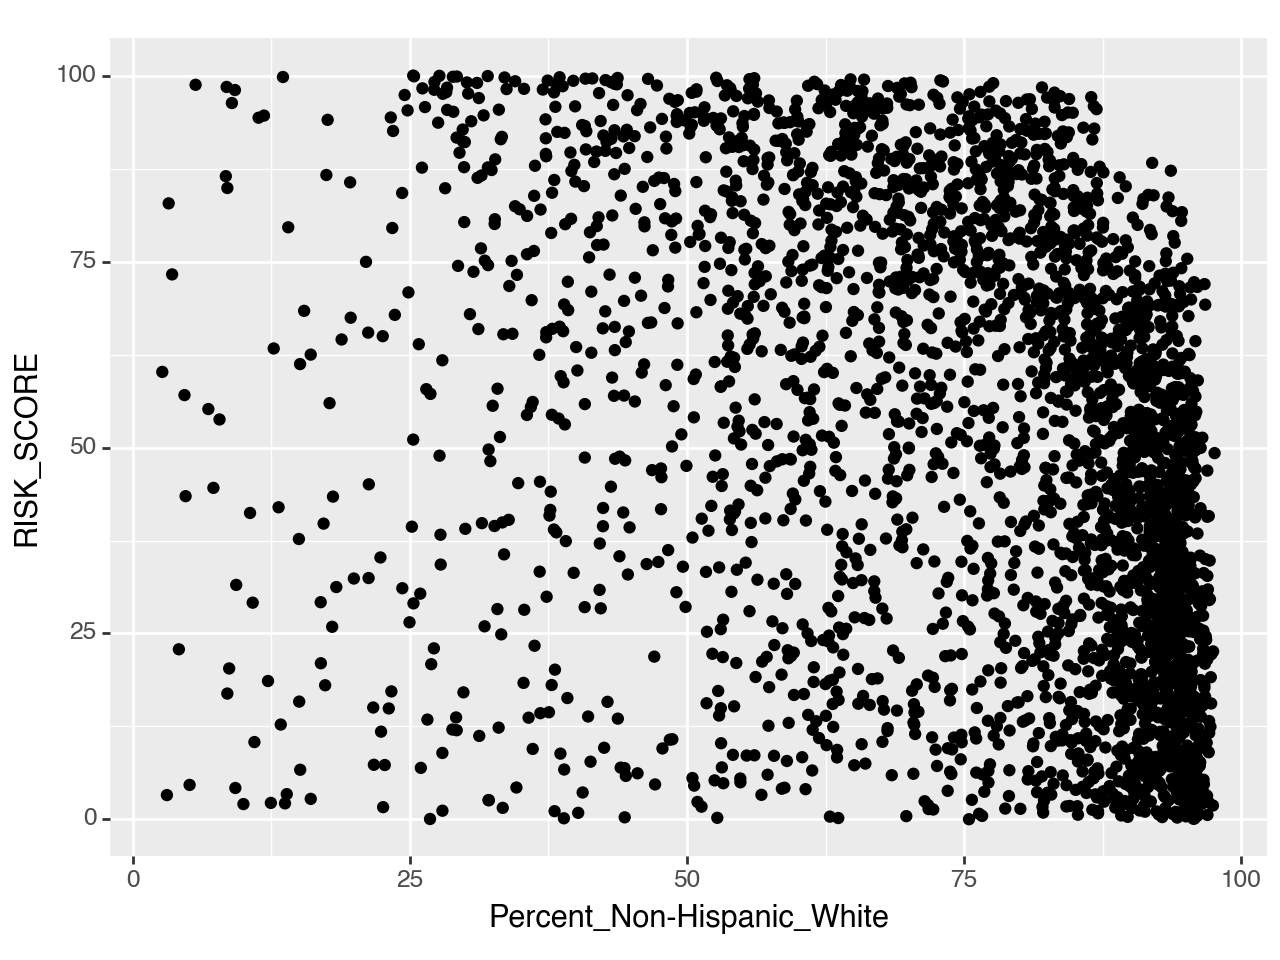

In [48]:
plot1 = (ggplot(Merged_County_Data) 
 + aes(x= "Percent_Non-Hispanic_White", y= "RISK_SCORE") 
 + geom_point())

print(plot1)

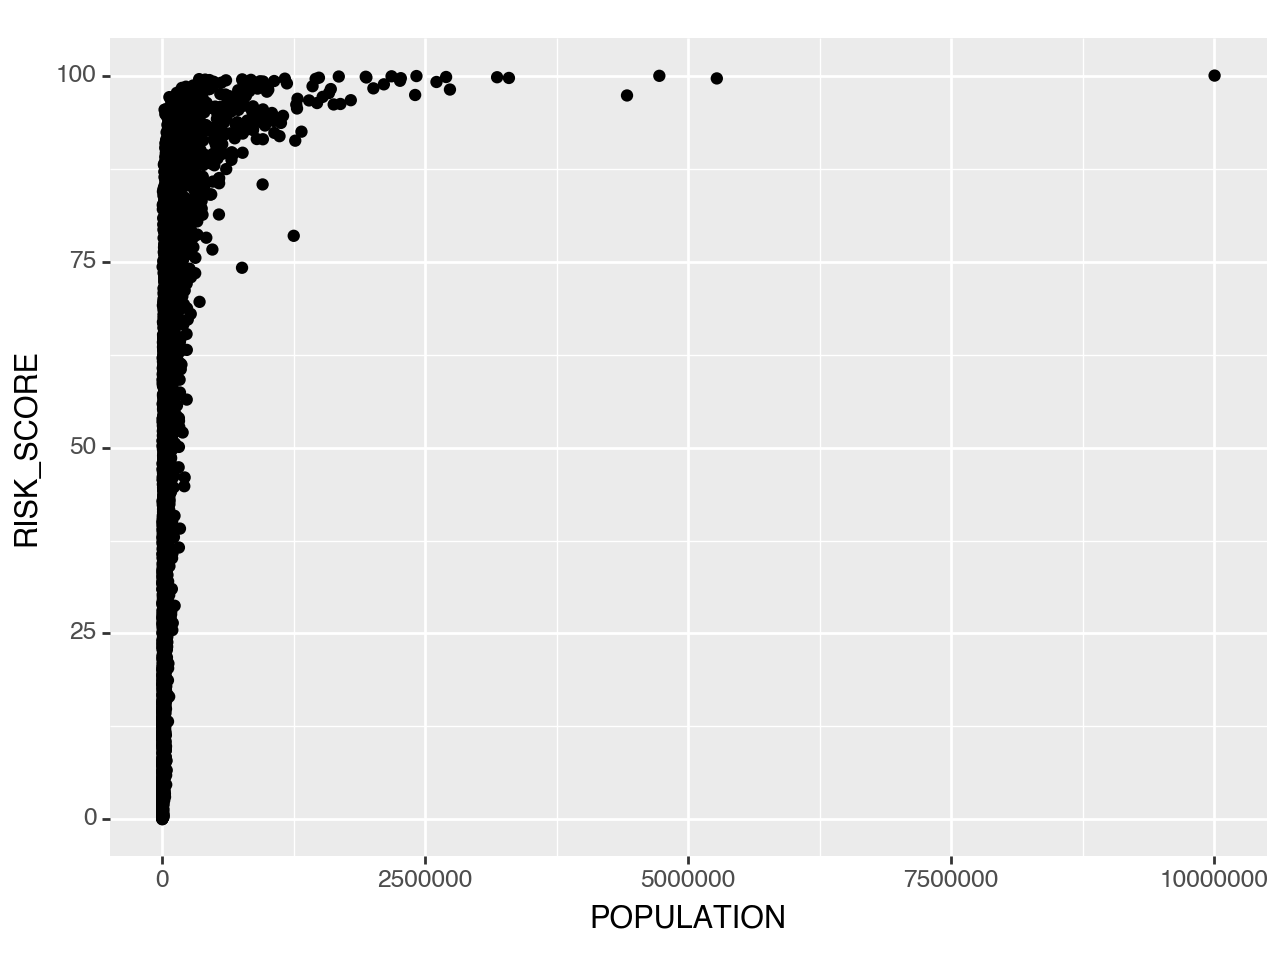

In [49]:
plot2 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "POPULATION", y= "RISK_SCORE") 
 + geom_point())

print(plot2)

In [50]:
#KL - woah these are big counties
Merged_County_Data.sort_values("POPULATION", ascending = False).head(5)

STATEABBRV     FIPS  POPULATION         AREA  RISK_SCORE  \
205          CA   6037.0  10005712.0  4797.383550  100.000000   
611          IL  17031.0   5272775.0  1651.135984   99.618199   
2624         TX  48201.0   4726200.0  1795.344568   99.968183   
104          AZ   4013.0   4418836.0  9319.141753   97.327394   
223          CA   6073.0   3295981.0  4571.491190   99.681833   

           RISK_RATNG   EAL_SCORE        EAL_RATNG  SOVI_SCORE  \
205         Very High  100.000000        Very High   85.839996   
611         Very High   99.597648        Very High   80.040001   
2624        Very High   99.969050        Very High   89.529999   
104   Relatively High   97.647787  Relatively High   73.970001   
223         Very High   99.690498        Very High   69.889999   

           SOVI_RATNG  ...  Percent_Asian  \
205         Very High  ...      15.646870   
611         Very High  ...       8.089507   
2624        Very High  ...       7.417889   
104   Relatively High  ...       4.804665   
223   Relatively High  ...      12.899607   

     Percent_Native_Hawaiian_or_Other_Pacific_Islander  Percent_Hispanic  \
205                                           0.368308         49.086601   
611                                           0.071330         26.030272   
2624                                          0.116560         44.365243   
104                                           0.298426         31.950915   
223                                           0.603031         34.849633   

      Percent_Non-Hispanic_White  Percent_Not_Proficient_in_English  \
205                    25.311988                          12.545321   
611                    41.471225                           6.509240   
2624                   27.671969                          11.089660   
104                    53.423440                           4.335683   
223                    43.750512                           6.150668   

      Percent_Female  Percent_Rural                      Geolocation  \
205        50.447325       0.605218  POINT (-118.2618616 34.1963983)   
611        51.174508       0.045296   POINT (-87.6454546 41.8942937)   
2624       50.208247       1.213280    POINT (-95.3930371 29.857273)   
104        50.295113       2.363800  POINT (-112.4989296 33.3451756)   
223        49.332713       3.297049  POINT (-116.7761174 33.0236041)   

         County_State  Community_Type  
205   Los Angeles, CA           Urban  
611          Cook, IL           Urban  
2624       Harris, TX           Urban  
104      Maricopa, AZ           Urban  
223     San Diego, CA           Urban  

[5 rows x 46 columns]

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 161 rows containing missing values.


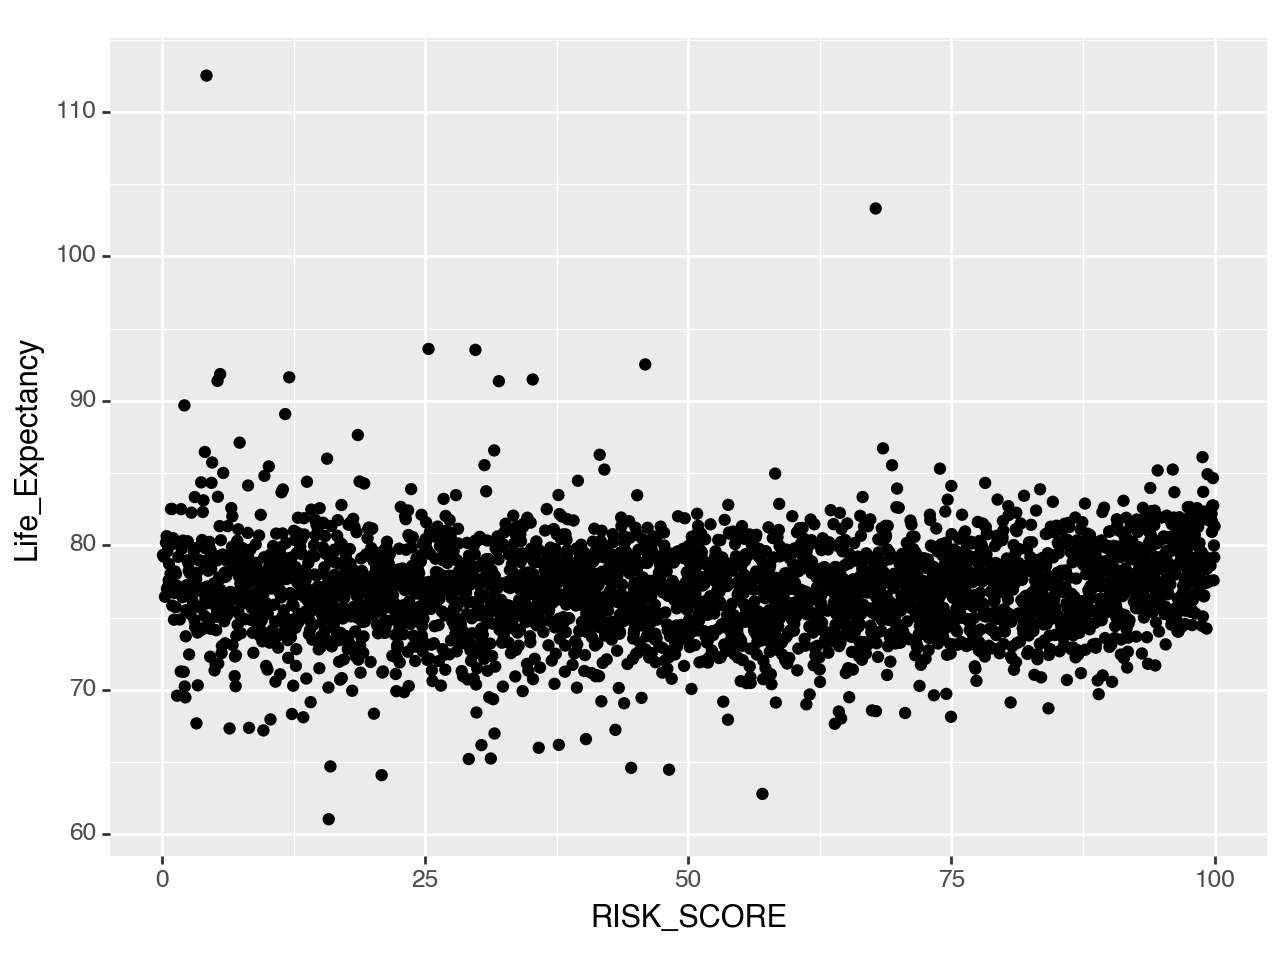

In [51]:
plot3 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y="Life_Expectancy") 
 + geom_point())

print(plot3)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 92 rows containing missing values.


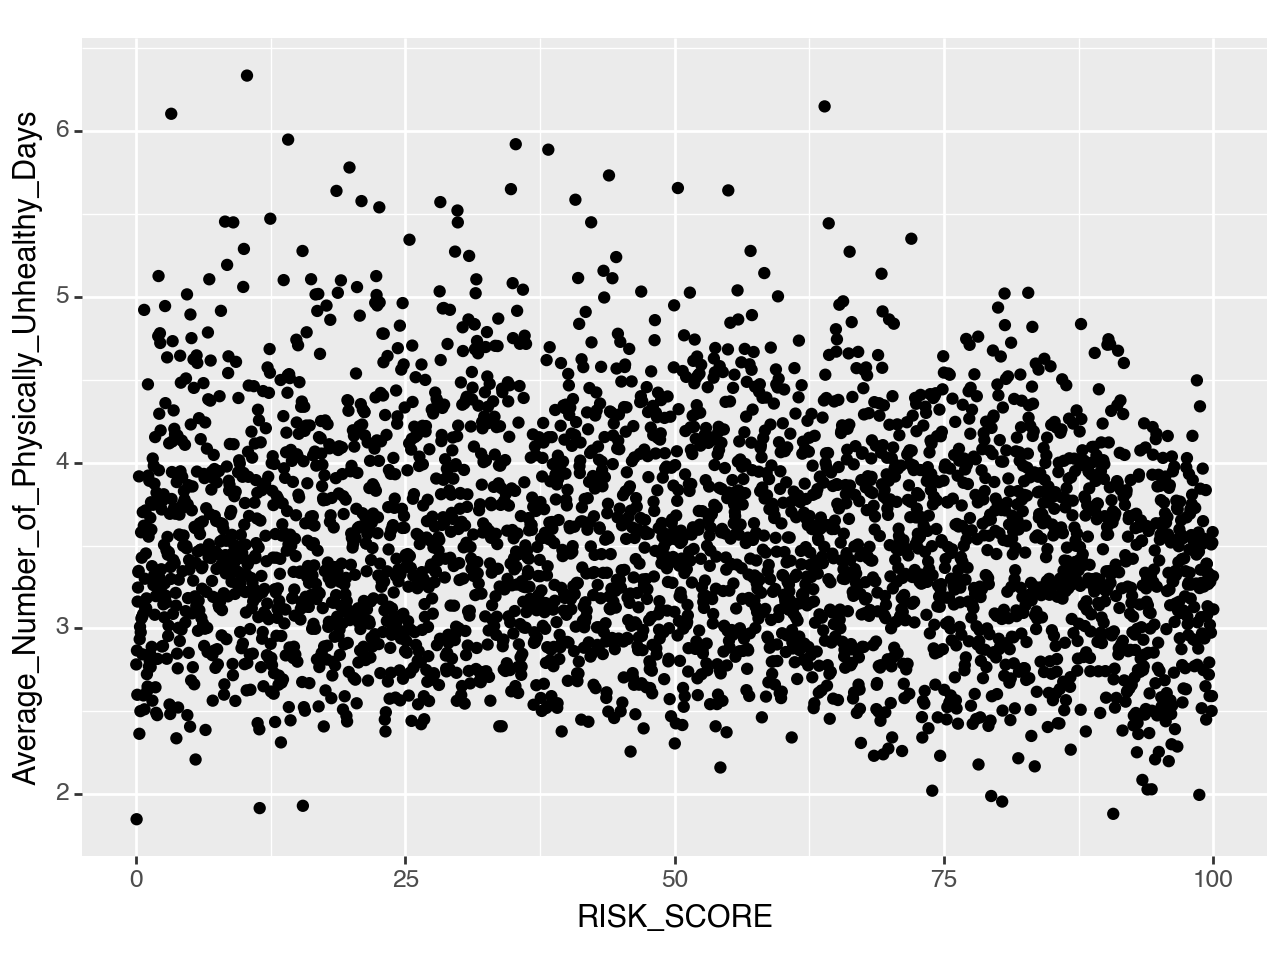

In [52]:
plot4 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y="Average_Number_of_Physically_Unhealthy_Days") 
 + geom_point())

print(plot4)



/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 92 rows containing missing values.


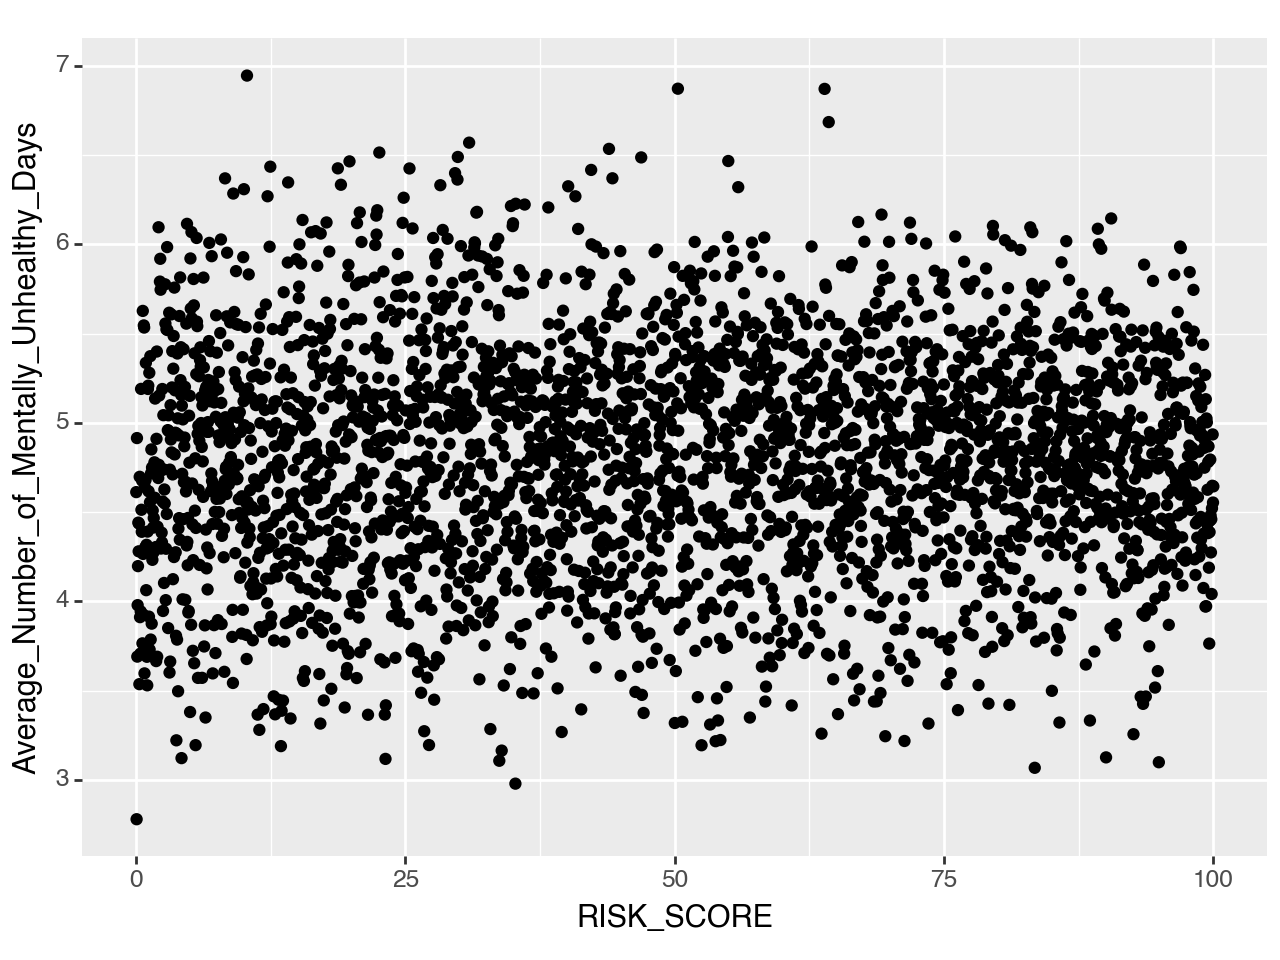

In [53]:
plot5 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y="Average_Number_of_Mentally_Unhealthy_Days") 
 + geom_point())

print(plot5)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 151 rows containing missing values.


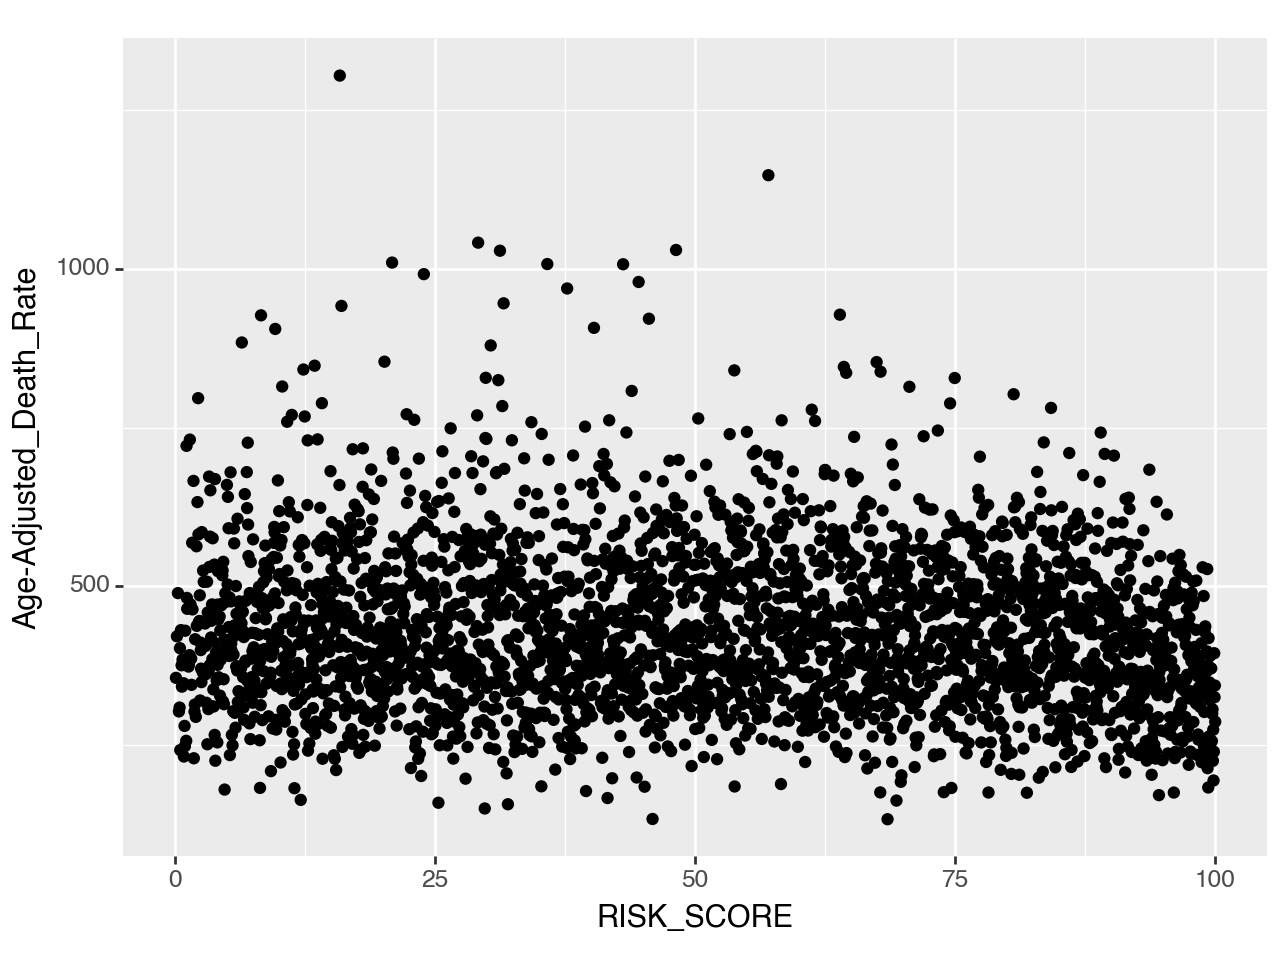

In [54]:
plot6 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y='Age-Adjusted_Death_Rate') 
 + geom_point())

print(plot6)



/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 62 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 62 rows containing missing values.


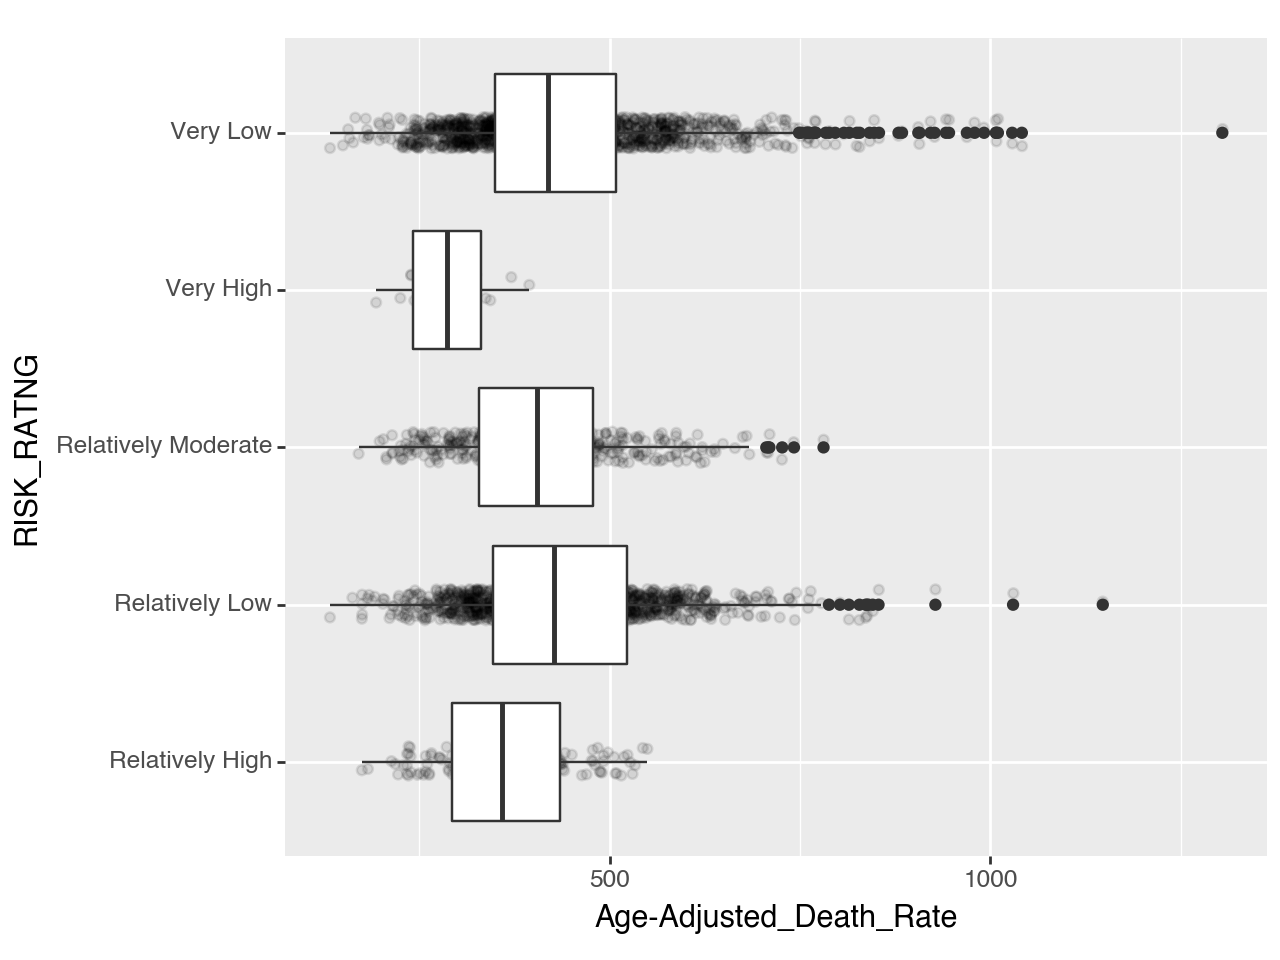

In [55]:
plot7 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_RATNG", y='Age-Adjusted_Death_Rate')
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())

print(plot7)

In [56]:
#sns.boxplot(y='RISK_RATNG',x = 'Age-Adjusted_Death_Rate',data=Merged_County_Data_clean)
#plt.show()


/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 72 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 72 rows containing missing values.


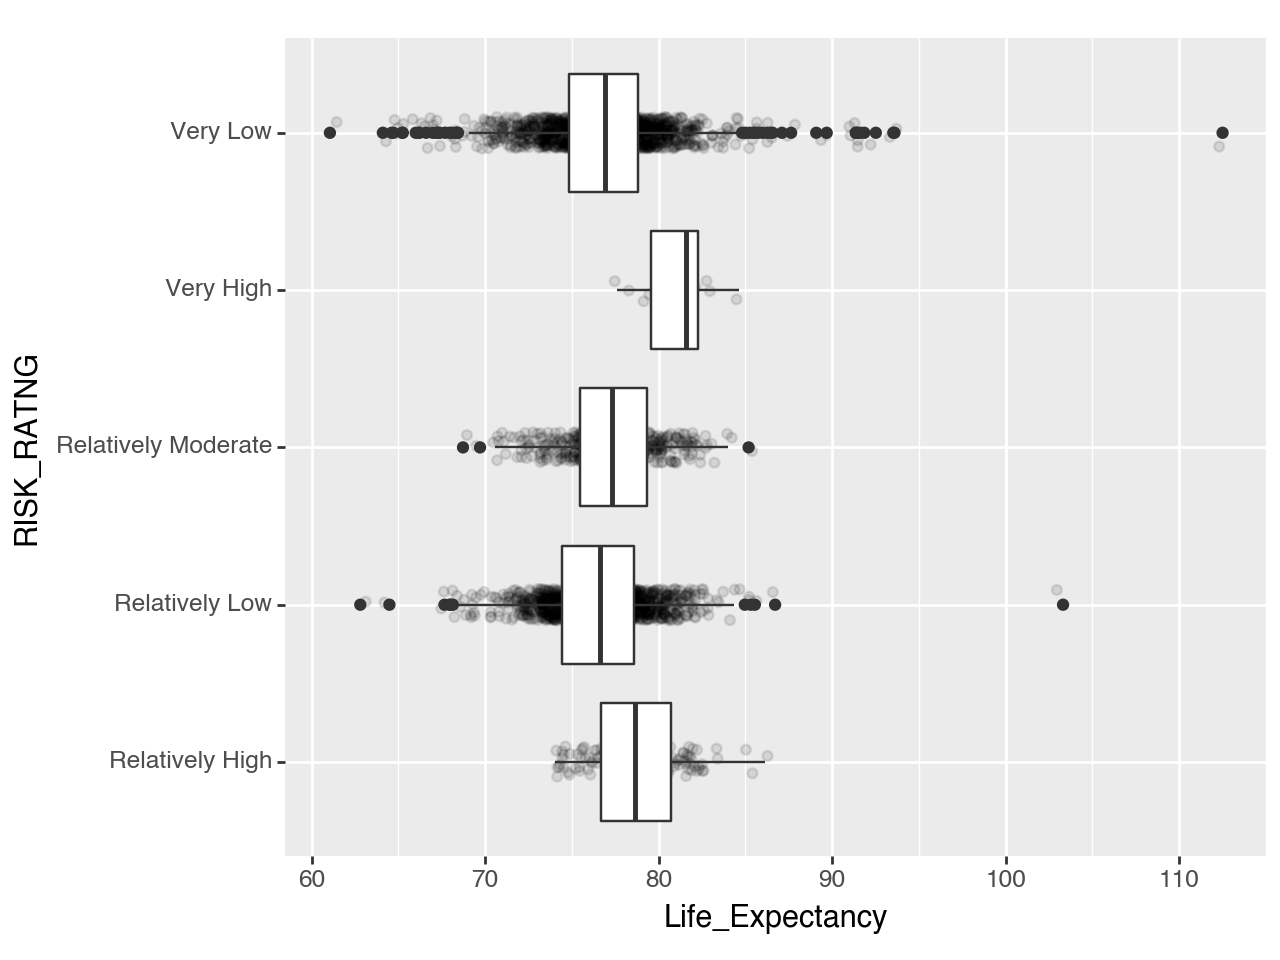

In [57]:
plot8 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_RATNG", y='Life_Expectancy') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())

print(plot8)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.


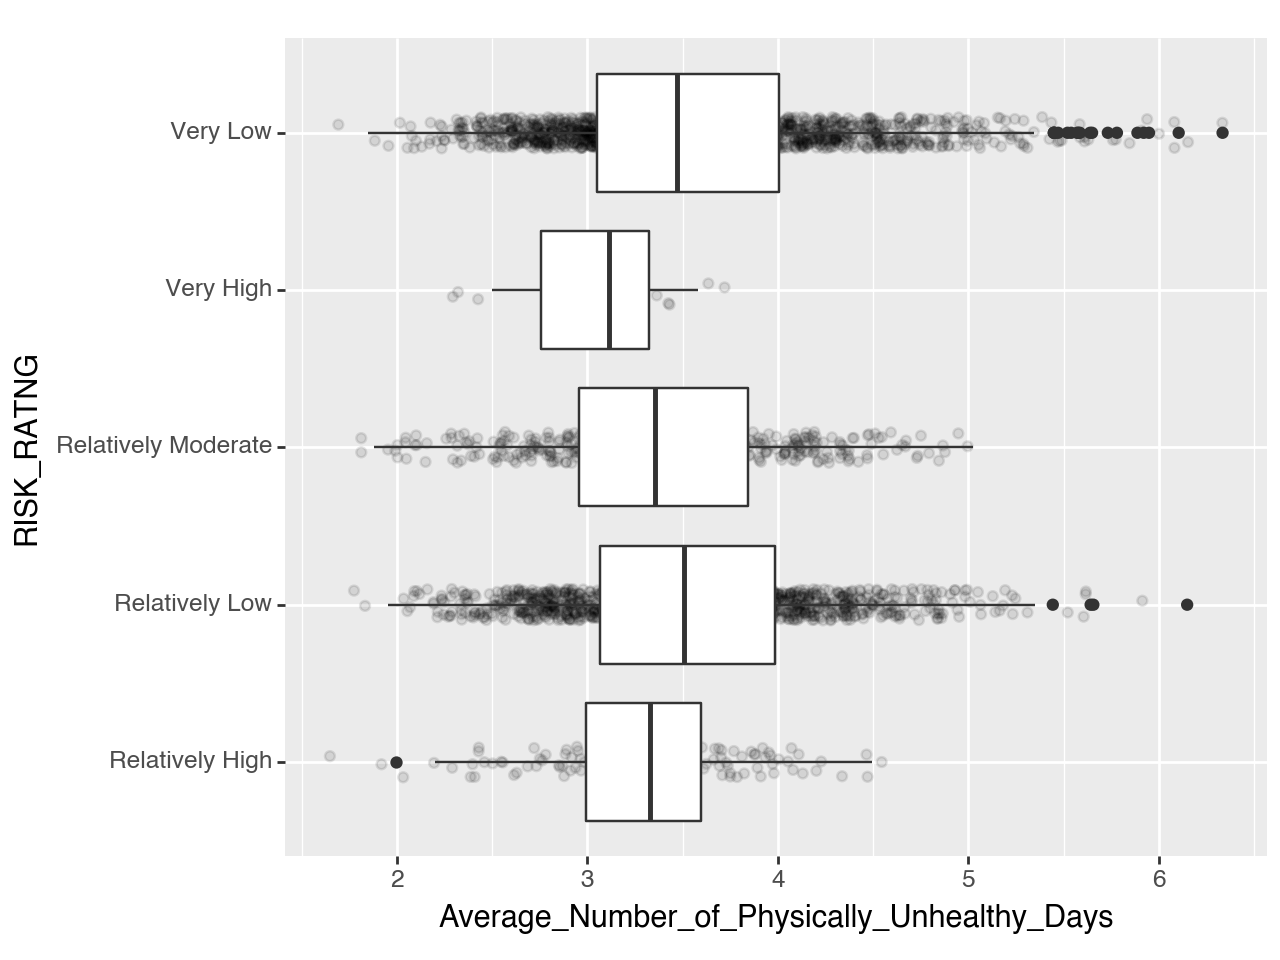

In [58]:
plot9 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_RATNG", y='Average_Number_of_Physically_Unhealthy_Days') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())

print(plot9)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.


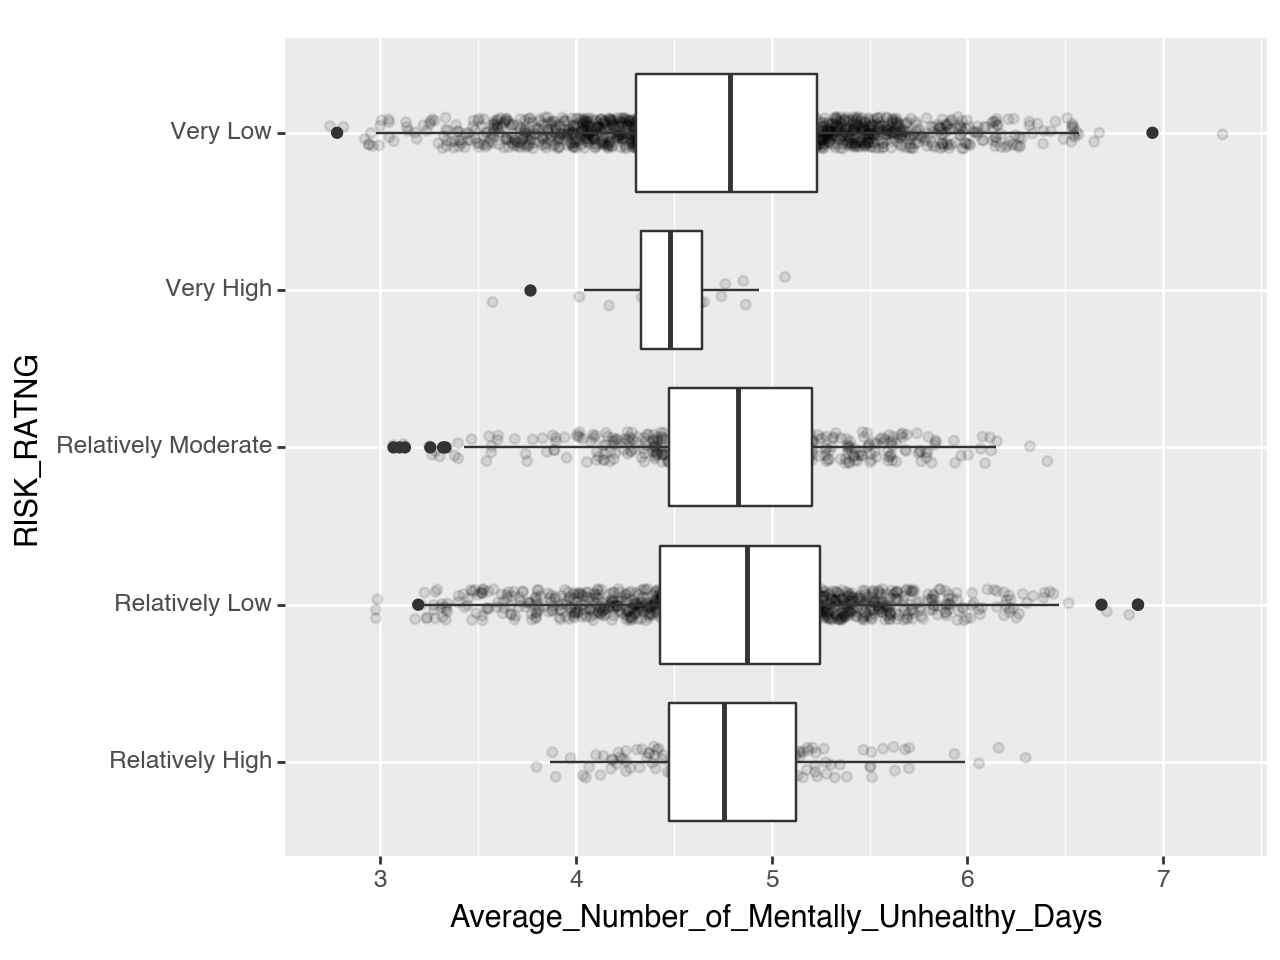

In [59]:
plot10 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_RATNG", y='Average_Number_of_Mentally_Unhealthy_Days') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())

print(plot10)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


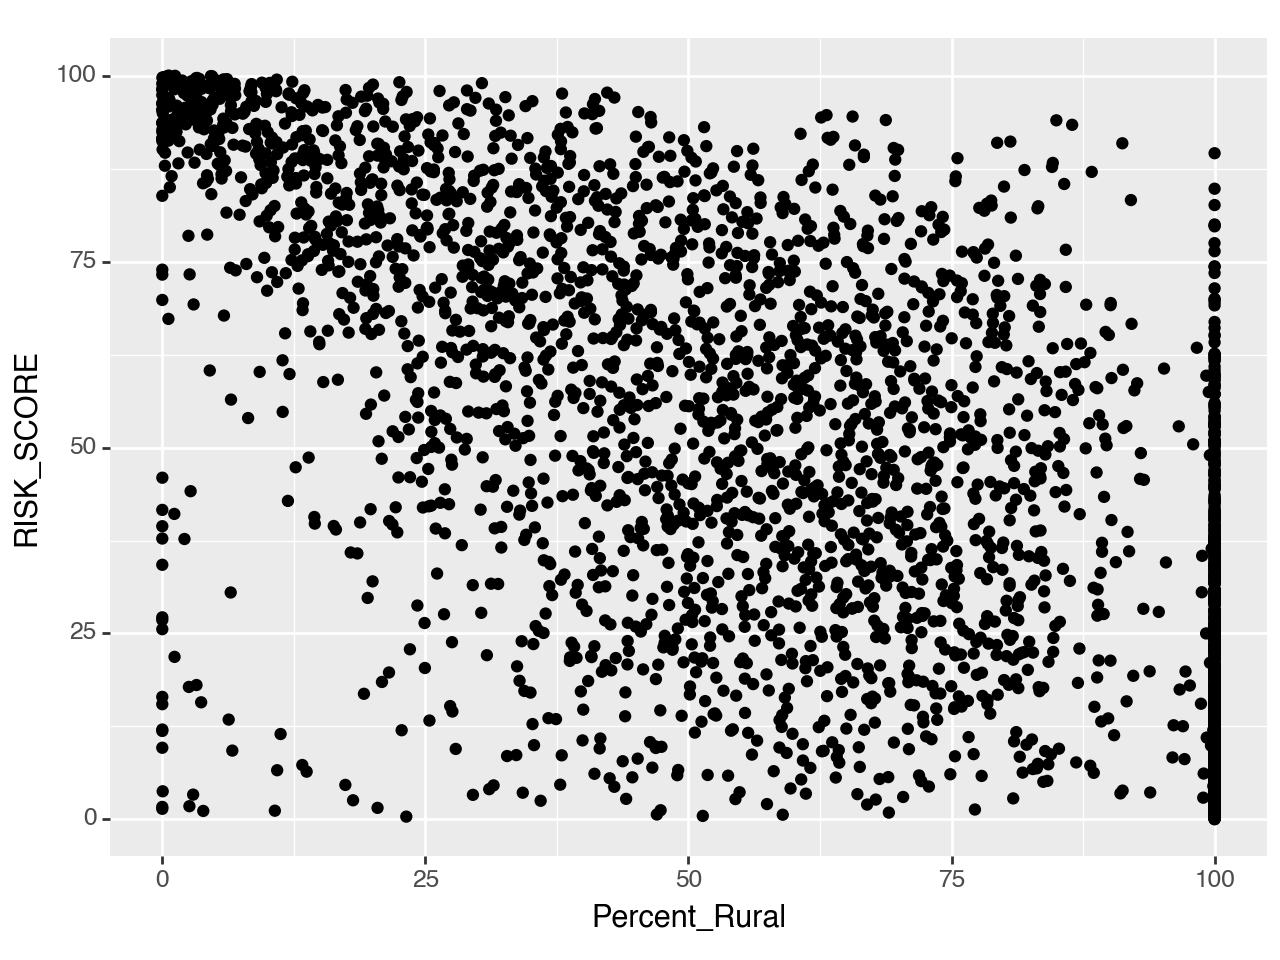

In [60]:
#county risk score versus percent rural

plot11 = (ggplot(Merged_County_Data_clean) 
 + aes(y= "RISK_SCORE", x='Percent_Rural') 
 + geom_point())

print(plot11)

In [61]:
Merged_County_Data_clean.sort_values("Percent_Rural", ascending = False).head(5)

STATEABBRV     FIPS  POPULATION         AREA  RISK_SCORE RISK_RATNG  \
869          IA  19159.0      4653.0   544.305638   20.076360   Very Low   
2442         TN  47027.0      7571.0   261.962018   10.467706   Very Low   
2297         PA  42105.0     16396.0  1092.382878    4.199809   Very Low   
2786         UT  49017.0      5083.0  5260.781516   19.949093   Very Low   
1994         ND  38007.0       945.0  1164.757517    3.913458   Very Low   

      EAL_SCORE EAL_RATNG  SOVI_SCORE           SOVI_RATNG  ...  \
869   22.717425  Very Low   18.709999             Very Low  ...   
2442   8.016094  Very Low   64.769997      Relatively High  ...   
2297   4.363974  Very Low   48.029999  Relatively Moderate  ...   
2786  19.158155  Very Low   40.259998  Relatively Moderate  ...   
1994   5.416280  Very Low    5.790000             Very Low  ...   

      Percent_Asian Percent_Native_Hawaiian_or_Other_Pacific_Islander  \
869        0.883811                                          0.086225   
2442       0.119126                                          0.119126   
2297       0.467433                                          0.006150   
2786       1.052837                                          0.292455   
1994       3.979058                                          0.000000   

      Percent_Hispanic  Percent_Non-Hispanic_White  \
869           2.823884                   94.524682   
2442          2.581072                   94.070152   
2297          1.642167                   96.026816   
2786          6.356015                   88.165334   
1994          3.036649                   91.204188   

      Percent_Not_Proficient_in_English  Percent_Female  Percent_Rural  \
869                            0.112334       49.816771          100.0   
2442                           1.381788       50.430179          100.0   
2297                           0.607223       49.775509          100.0   
2786                           0.949968       47.338663          100.0   
1994                           0.000000       46.596859          100.0   

                          Geolocation  County_State  Community_Type  
869    POINT (-94.2442514 40.7353342)  Ringgold, IA           Rural  
2442   POINT (-85.5457173 36.5457493)      Clay, TN           Rural  
2297   POINT (-77.8944358 41.7485866)    Potter, PA           Rural  
2786  POINT (-111.4509076 37.8316645)  Garfield, UT           Rural  
1994   POINT (-103.3640163 47.007044)  Billings, ND           Rural  

[5 rows x 46 columns]

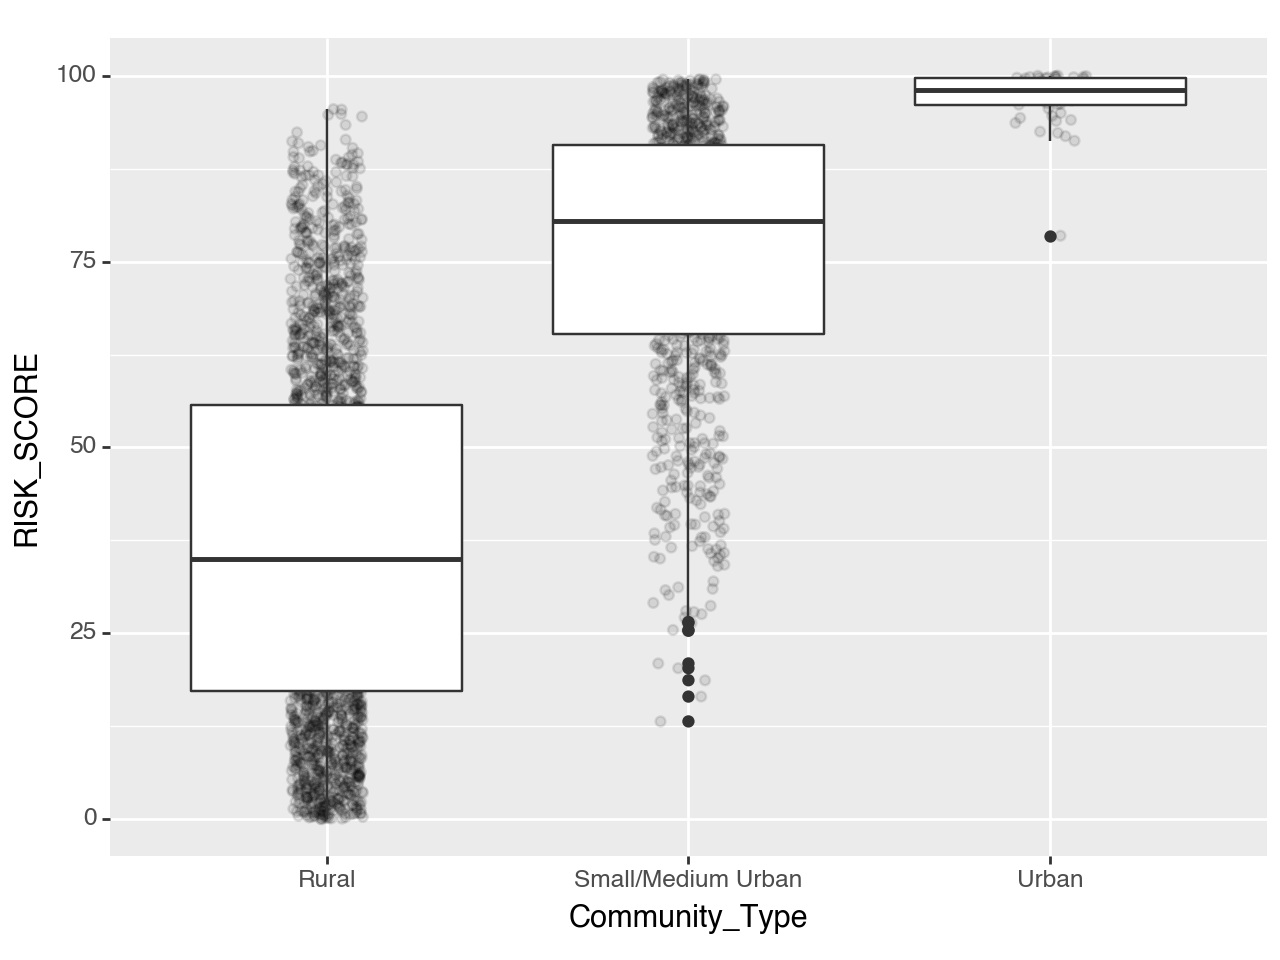

In [62]:
#plot community type and climate risk 
plot12 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='RISK_SCORE') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot())

print(plot12)

In [63]:
Merged_County_Data_clean.loc[Merged_County_Data['Community_Type'] == 'Rural'].sort_values("RISK_SCORE", ascending = False).head(10)

STATEABBRV     FIPS  POPULATION         AREA  RISK_SCORE  \
1918         NC  37055.0     36860.0  1557.298013   95.482024   
192          CA   6011.0     21811.0  1168.027228   95.418390   
197          CA   6021.0     28889.0  1340.372922   94.813872   
1164         LA  22101.0     49313.0  1131.027710   94.718422   
1897         NC  37013.0     44607.0   972.568215   94.495705   
1921         NC  37061.0     48624.0   828.497933   93.382119   
2212         OR  41007.0     41036.0  1094.535576   92.363983   
26           AL   1053.0     36706.0   962.761819   91.377665   
345          FL  12051.0     39371.0  1201.385234   91.154948   
1899         NC  37017.0     29597.0   896.744081   90.900414   

               RISK_RATNG  EAL_SCORE            EAL_RATNG  SOVI_SCORE  \
1918      Relatively High  95.666976      Relatively High   27.719999   
192   Relatively Moderate  93.964717  Relatively Moderate   76.419998   
197   Relatively Moderate  94.026617  Relatively Moderate   88.540001   
1164  Relatively Moderate  93.902816  Relatively Moderate   86.379997   
1897  Relatively Moderate  93.469514  Relatively Moderate   84.599998   
1921  Relatively Moderate  91.612504  Relatively Moderate   90.129997   
2212  Relatively Moderate  91.736305  Relatively Moderate   56.080002   
26    Relatively Moderate  89.755494  Relatively Moderate   87.080002   
345   Relatively Moderate  86.010523  Relatively Moderate   99.589996   
1899  Relatively Moderate  88.579387  Relatively Moderate   87.650002   

               SOVI_RATNG  ...  Percent_Asian  \
1918       Relatively Low  ...       0.964945   
192       Relatively High  ...       1.560433   
197             Very High  ...       3.013366   
1164            Very High  ...       1.573644   
1897            Very High  ...       0.611676   
1921            Very High  ...       0.876018   
2212  Relatively Moderate  ...       1.664674   
26              Very High  ...       0.318810   
345             Very High  ...       1.088979   
1899            Very High  ...       0.508044   

     Percent_Native_Hawaiian_or_Other_Pacific_Islander  Percent_Hispanic  \
1918                                          0.066092          7.605880   
192                                           0.634211         61.258384   
197                                           0.253428         43.957646   
1164                                          0.082932          7.422458   
1897                                          0.089952          8.545471   
1921                                          0.583325         23.516438   
2212                                          0.356374          9.186797   
26                                            0.076296          2.648574   
345                                           0.228214         56.510307   
1899                                          0.050804          8.247248   

      Percent_Non-Hispanic_White  Percent_Not_Proficient_in_English  \
1918                   86.948131                           1.569863   
192                    33.038281                          13.309957   
197                    49.109530                           9.032768   
1164                   56.045779                           2.568902   
1897                   65.793380                           1.095249   
1921                   50.446254                           6.959848   
2212                   84.448696                           1.189986   
26                     60.077931                           0.500475   
345                    29.796840                          14.041611   
1899                   54.574090                           1.077941   

      Percent_Female  Percent_Rural                      Geolocation  \
1918       50.716438      28.959316   POINT (-75.7675364 35.6062688)   
192        48.952868      31.724170  POINT (-122.2375629 39.1777385)   
197        48.699878      40.871915  POINT (-122.4016998 39.6025462)   
1164       50.449909      13.039341   

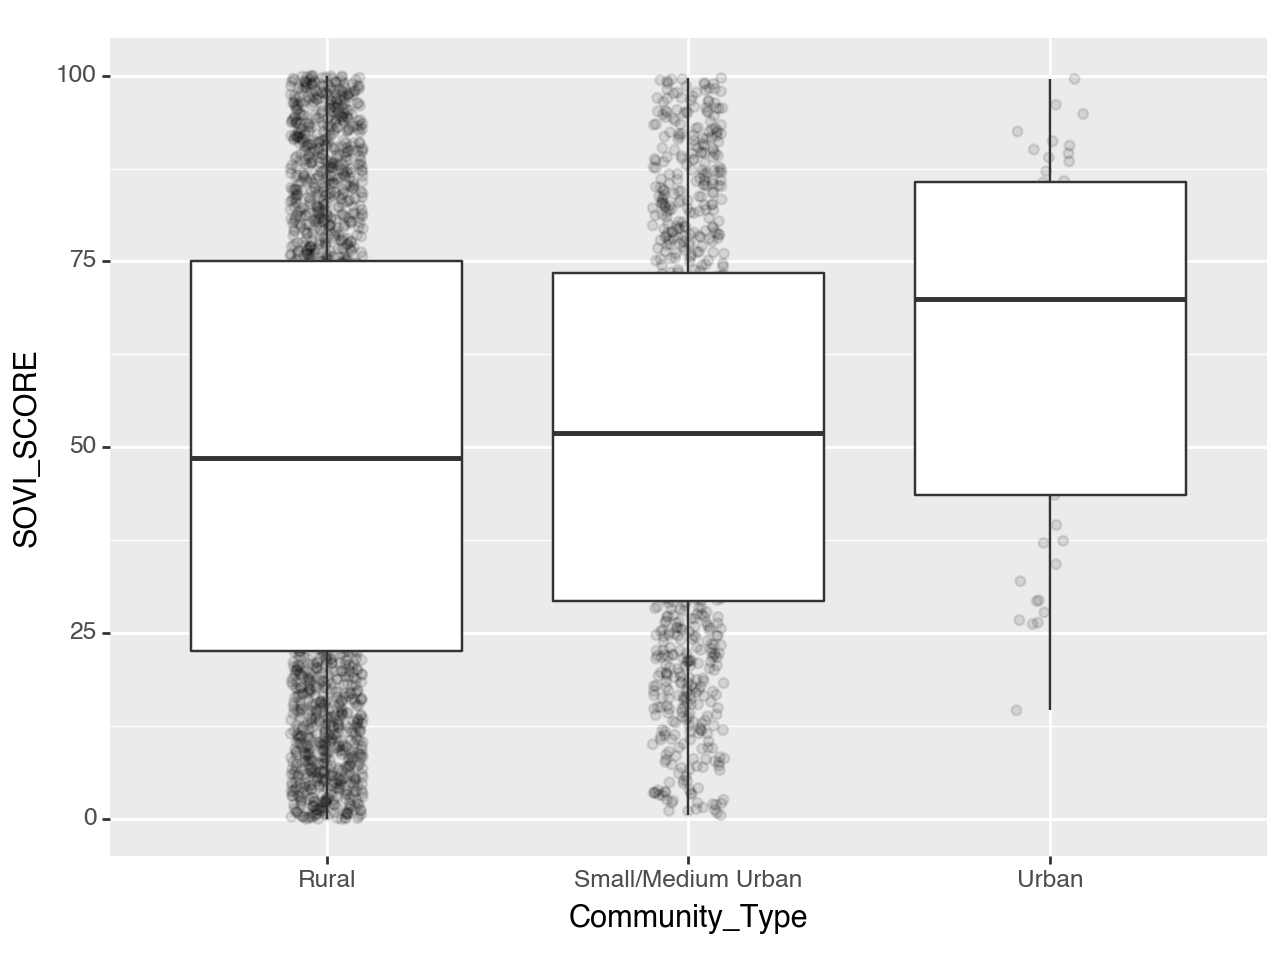

In [64]:
#social vulnerability score and community type
plot13 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='SOVI_SCORE') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot())

print(plot13)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


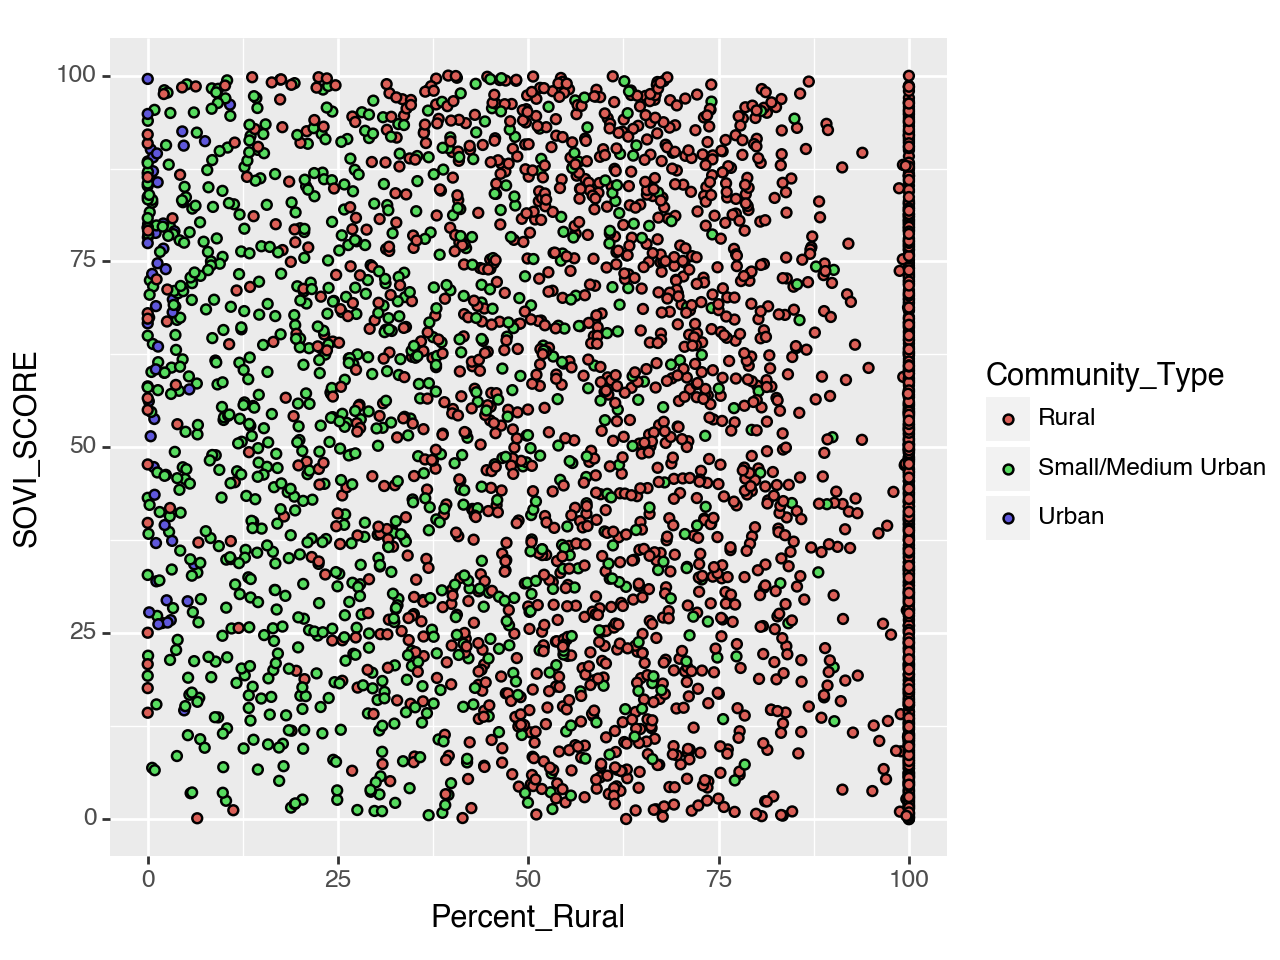

In [65]:
plot14 = (ggplot(Merged_County_Data_clean) 
 + aes(y= "SOVI_SCORE", x='Percent_Rural', fill = "Community_Type") 
 + geom_point())

print(plot14)

#KL - what are the small/medium metro areas that are more than 75% rural??

In [66]:
Merged_County_Data_clean.loc[Merged_County_Data['Community_Type'] == 'Small/Medium Urban'].sort_values("Percent_Rural", ascending = False).head(5)

STATEABBRV     FIPS  POPULATION         AREA  RISK_SCORE      RISK_RATNG  \
1766         NH  33003.0     50016.0  1003.522927   59.338212  Relatively Low   
24           AL   1049.0     71379.0   786.523685   69.424117  Relatively Low   
1182         ME  23009.0     55442.0  2368.603302   69.137766  Relatively Low   
4            AL   1009.0     58992.0   657.196555   65.128858  Relatively Low   
2853         VA  51067.0     54455.0   718.799727   13.172129        Very Low   

      EAL_SCORE       EAL_RATNG  SOVI_SCORE           SOVI_RATNG  ...  \
1766  62.488394  Relatively Low   13.180000             Very Low  ...   
24    64.747756  Relatively Low   73.870003      Relatively High  ...   
1182  70.133086  Relatively Low   20.430000       Relatively Low  ...   
4     63.633550  Relatively Low   51.369999  Relatively Moderate  ...   
2853  14.268028        Very Low   42.360001  Relatively Moderate  ...   

      Percent_Asian Percent_Native_Hawaiian_or_Other_Pacific_Islander  \
1766       0.821359                                          0.027184   
24         0.512442                                          0.640553   
1182       1.302677                                          0.037372   
4          0.403110                                          0.123643   
2853       0.536969                                          0.061888   

      Percent_Hispanic  Percent_Non-Hispanic_White  \
1766          1.700971                   95.403883   
24           15.791013                   79.002409   
1182          1.720886                   94.113041   
4             9.867719                   86.329839   
2853          3.070734                   86.887036   

      Percent_Not_Proficient_in_English  Percent_Female  Percent_Rural  \
1766                           0.068493       50.133981      90.202434   
24                             3.759745       50.149694      90.130645   
1182                           0.167899       51.352506      90.113565   
4                              1.726907       50.192239      89.951502   
2853                           0.523999       50.356766      89.230577   

                         Geolocation  County_State      Community_Type  
1766  POINT (-71.2015596 43.8677742)   Carroll, NH  Small/Medium Urban  
24    POINT (-85.8040207 34.4609148)    DeKalb, AL  Small/Medium Urban  
1182  POINT (-68.3707034 44.5649063)   Hancock, ME  Small/Medium Urban  
4       POINT (-86.56644 33.9773575)    Blount, AL  Small/Medium Urban  
2853  POINT (-79.8827149 36.9911862)  Franklin, VA  Small/Medium Urban  

[5 rows x 46 columns]

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 62 rows containing missing values.


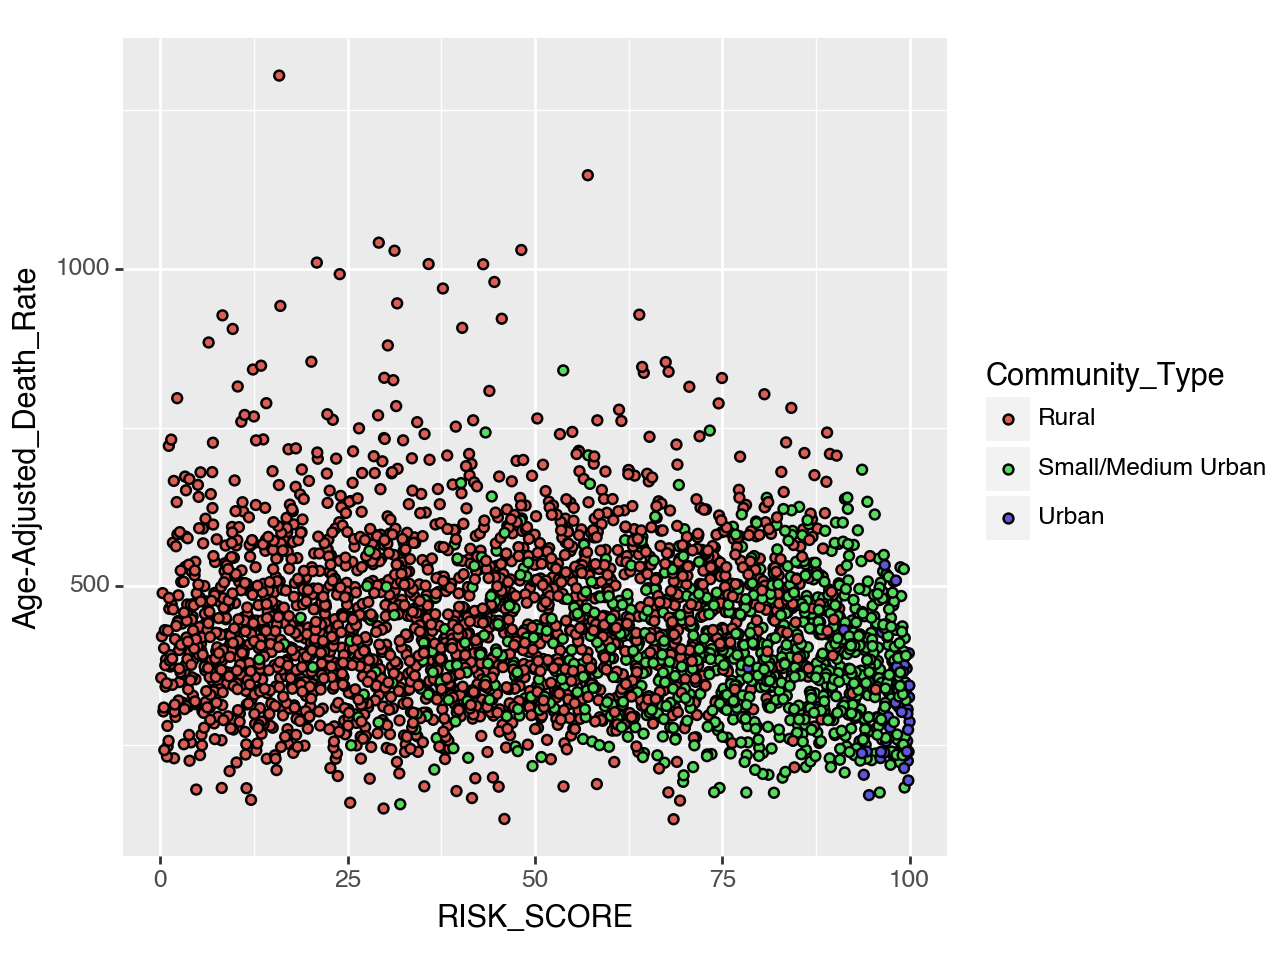

In [67]:
plot15 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Age-Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

print(plot15)

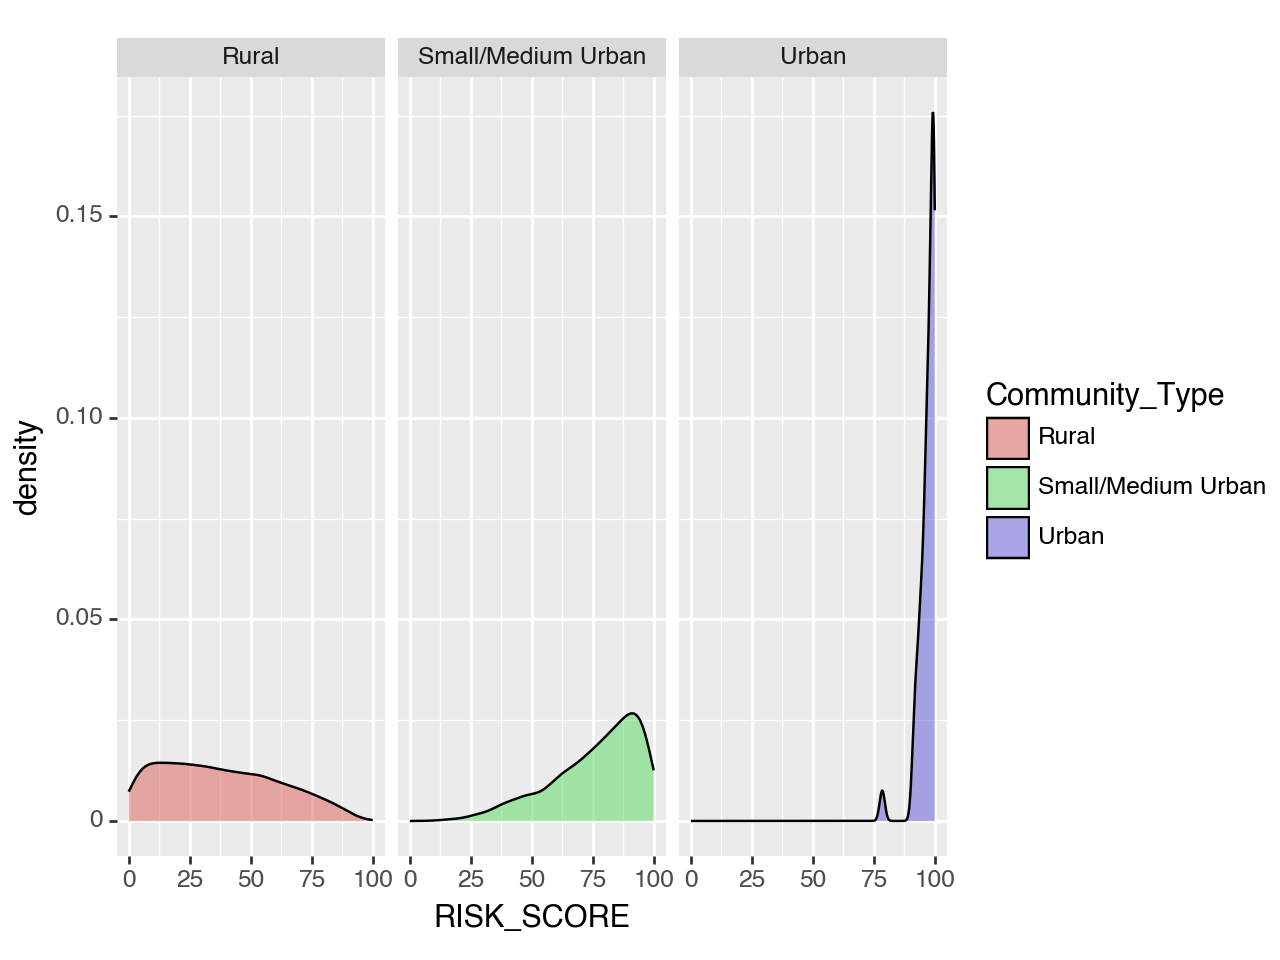

<Figure Size: (640 x 480)>

In [68]:
(ggplot(Merged_County_Data_clean, aes(x = 'RISK_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

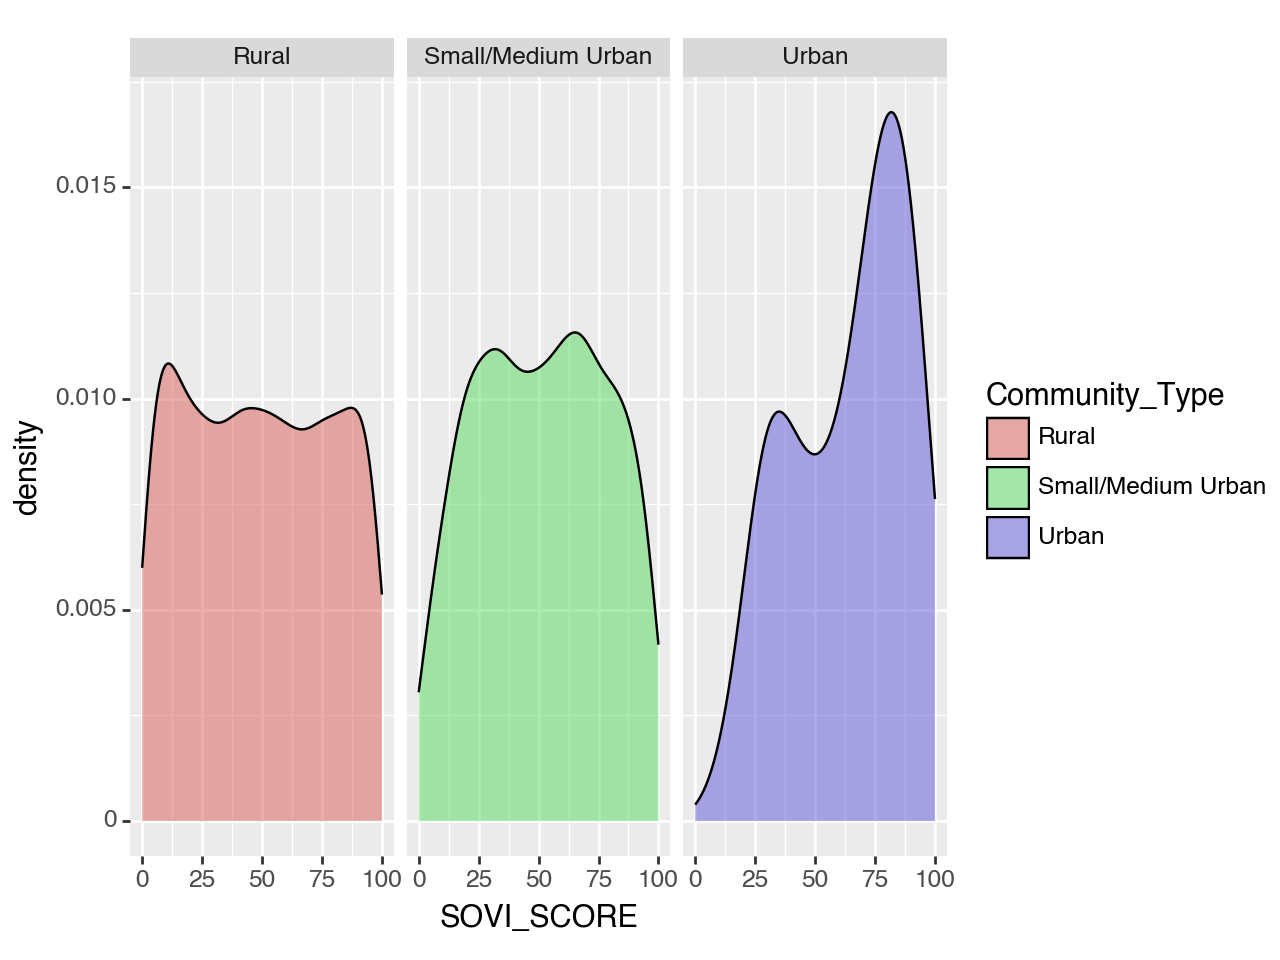

<Figure Size: (640 x 480)>

In [69]:
(ggplot(Merged_County_Data_clean, aes(x = 'SOVI_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

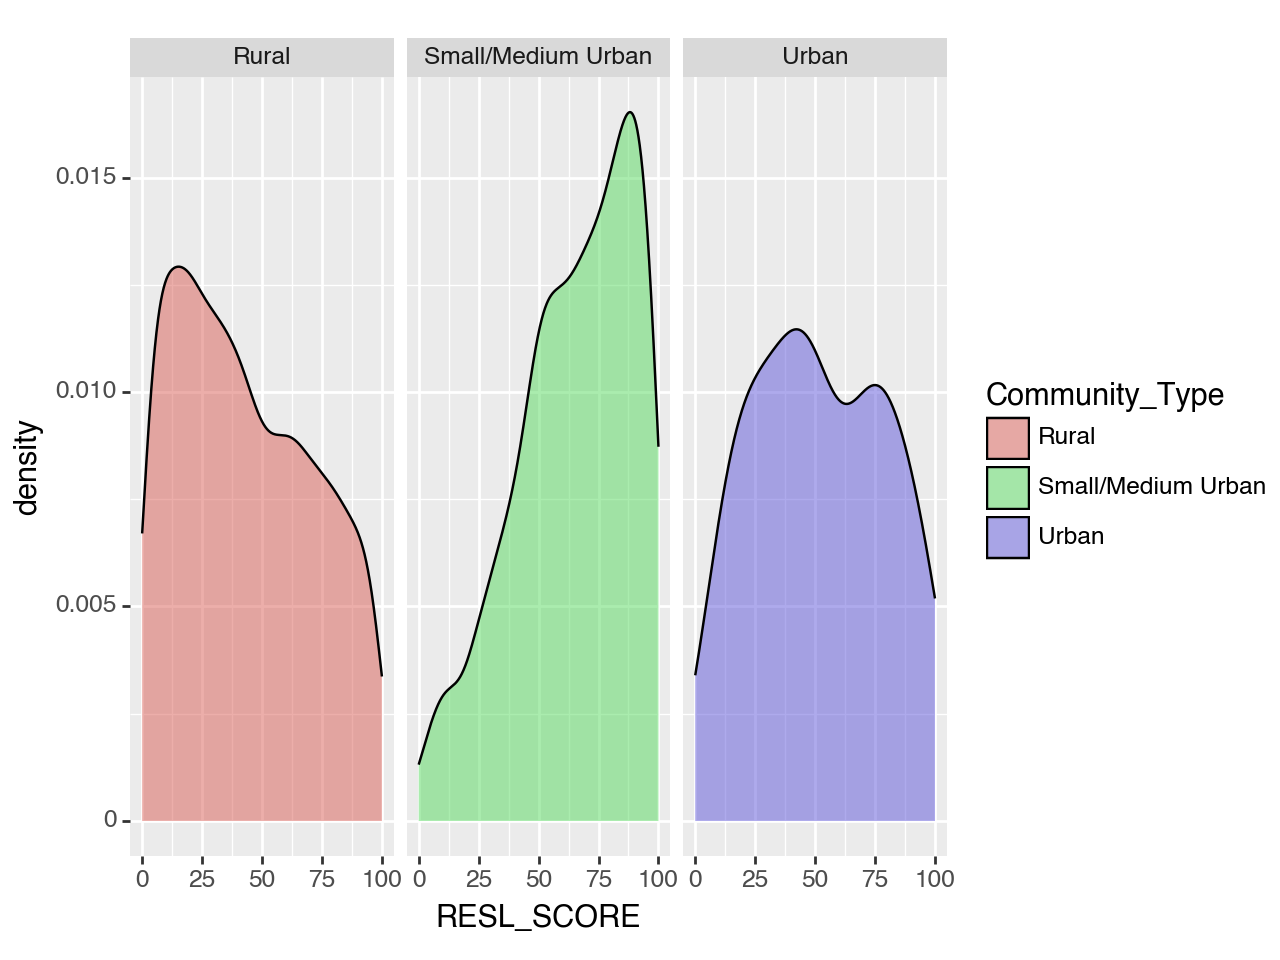

<Figure Size: (640 x 480)>

In [70]:
(ggplot(Merged_County_Data_clean, aes(x = 'RESL_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


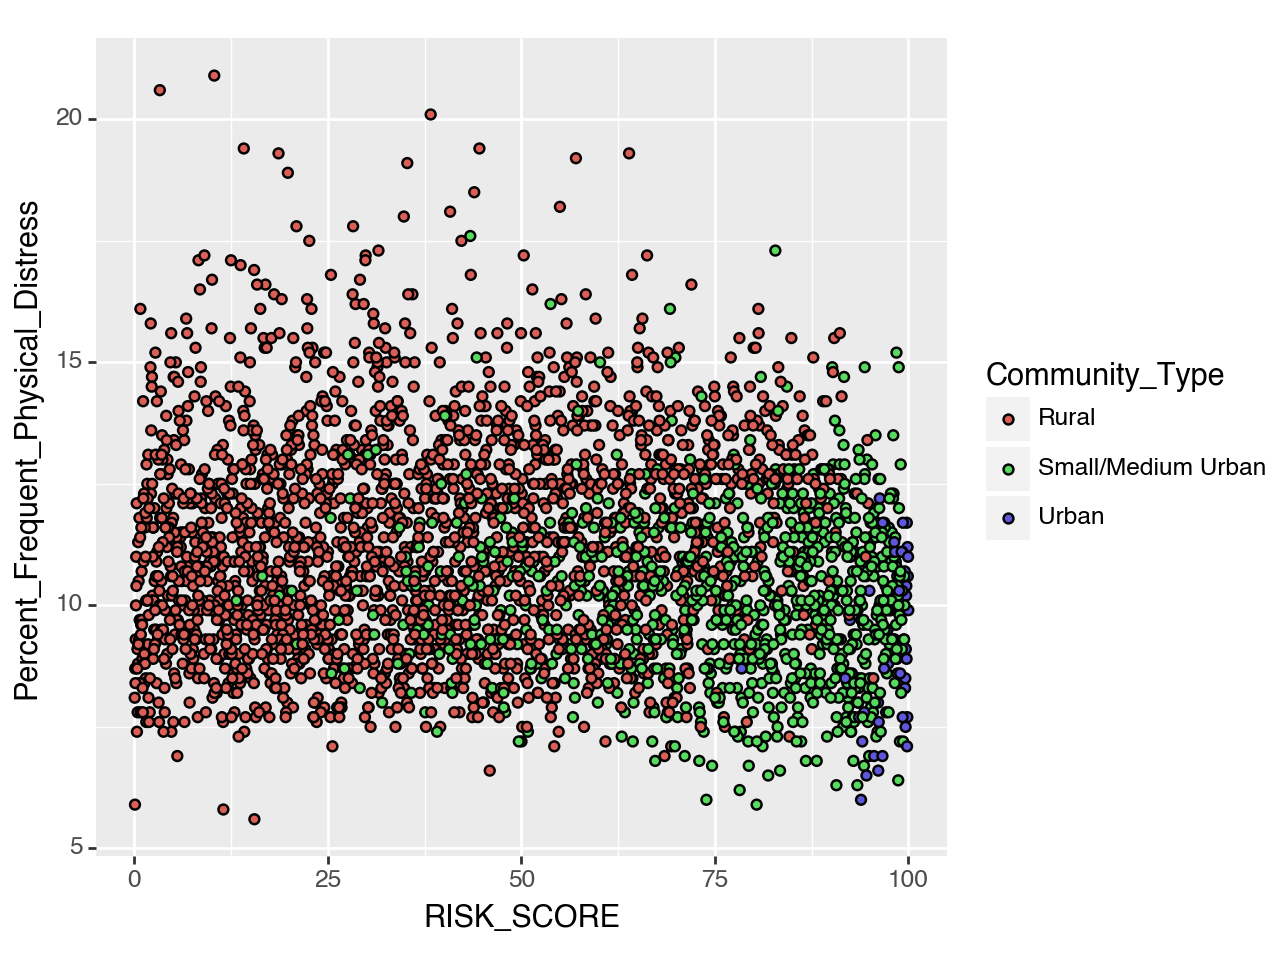

In [71]:
plot17 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Percent_Frequent_Physical_Distress', fill = "Community_Type") 
 + geom_point())

print(plot17)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


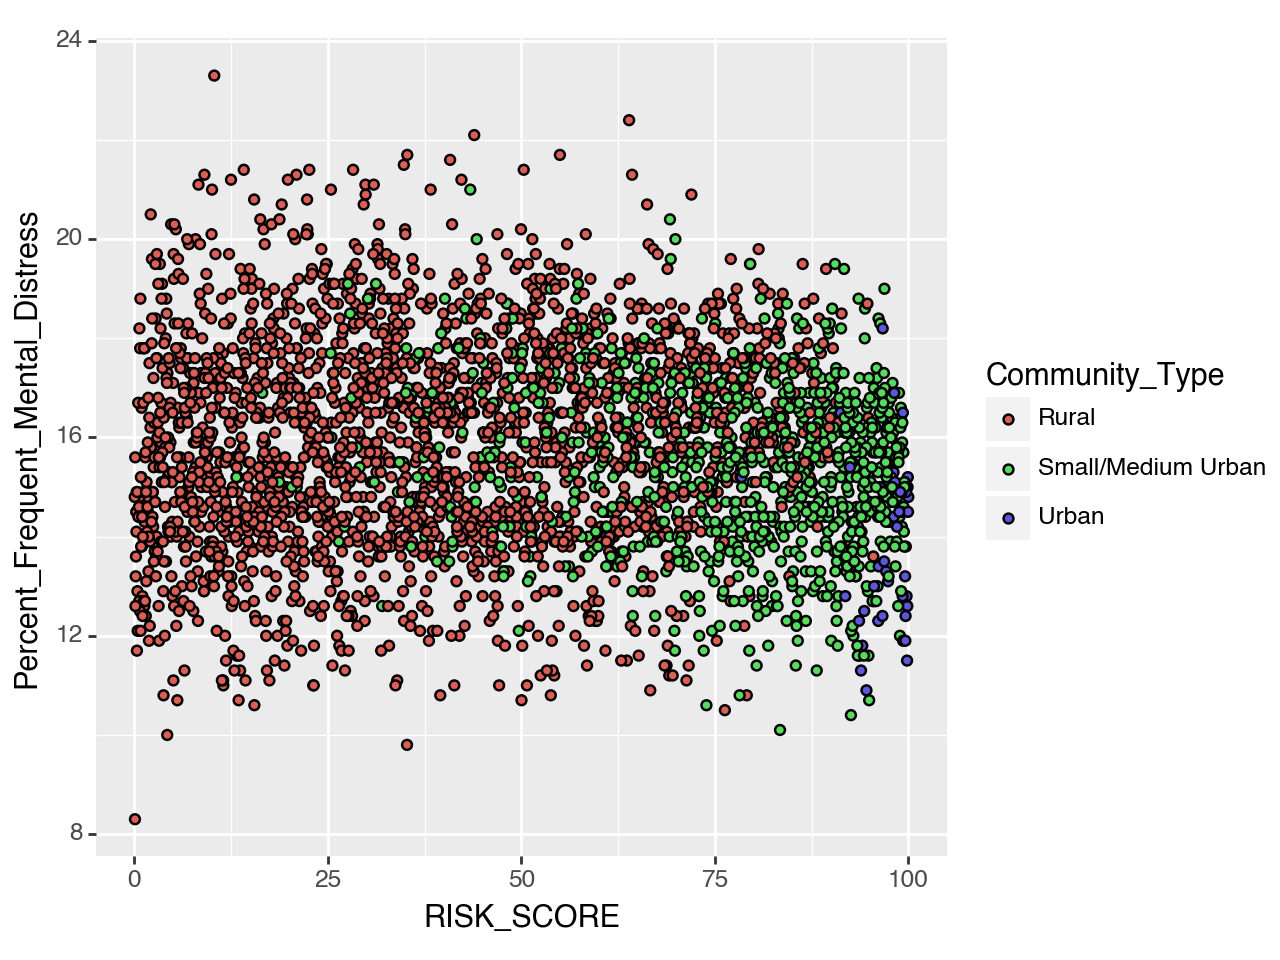

In [72]:
plot18 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Percent_Frequent_Mental_Distress', fill = "Community_Type") 
 + geom_point())

print(plot18)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.


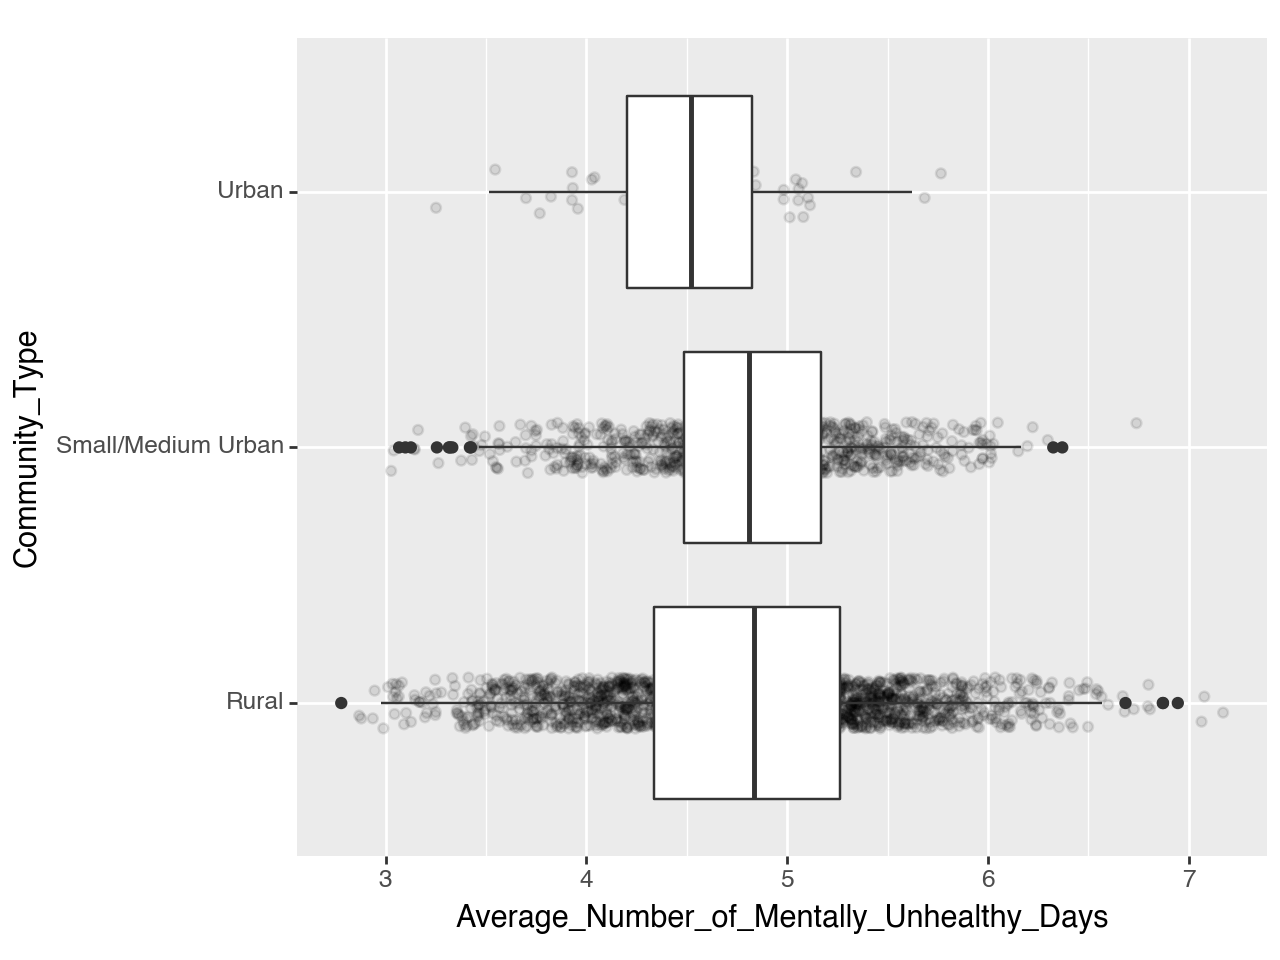

In [73]:
plot19 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='Average_Number_of_Mentally_Unhealthy_Days') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())

print(plot19)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.


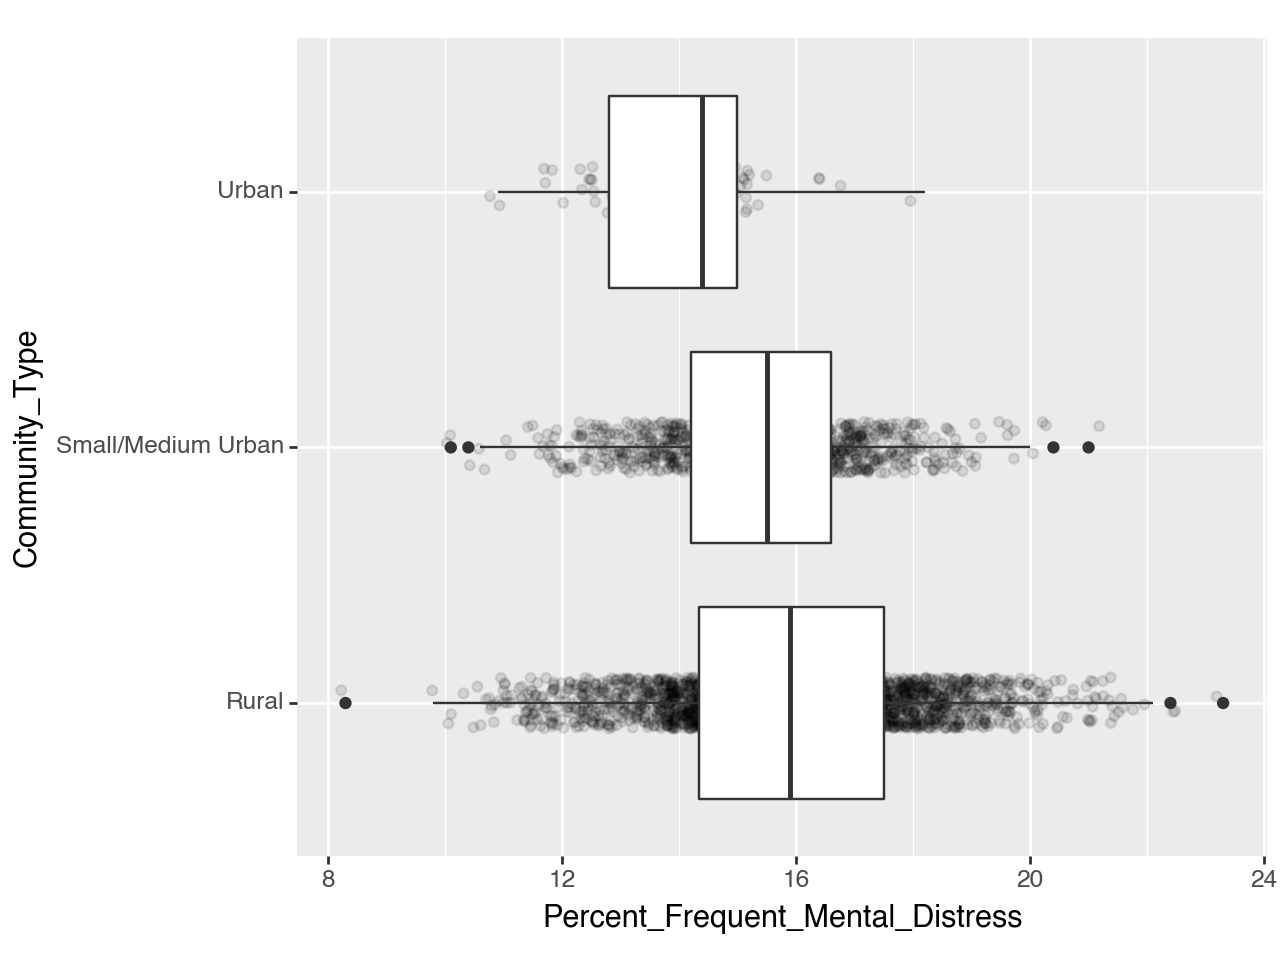

<Figure Size: (640 x 480)>

In [74]:
(ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='Percent_Frequent_Mental_Distress') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())


/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 28 rows containing missing values.


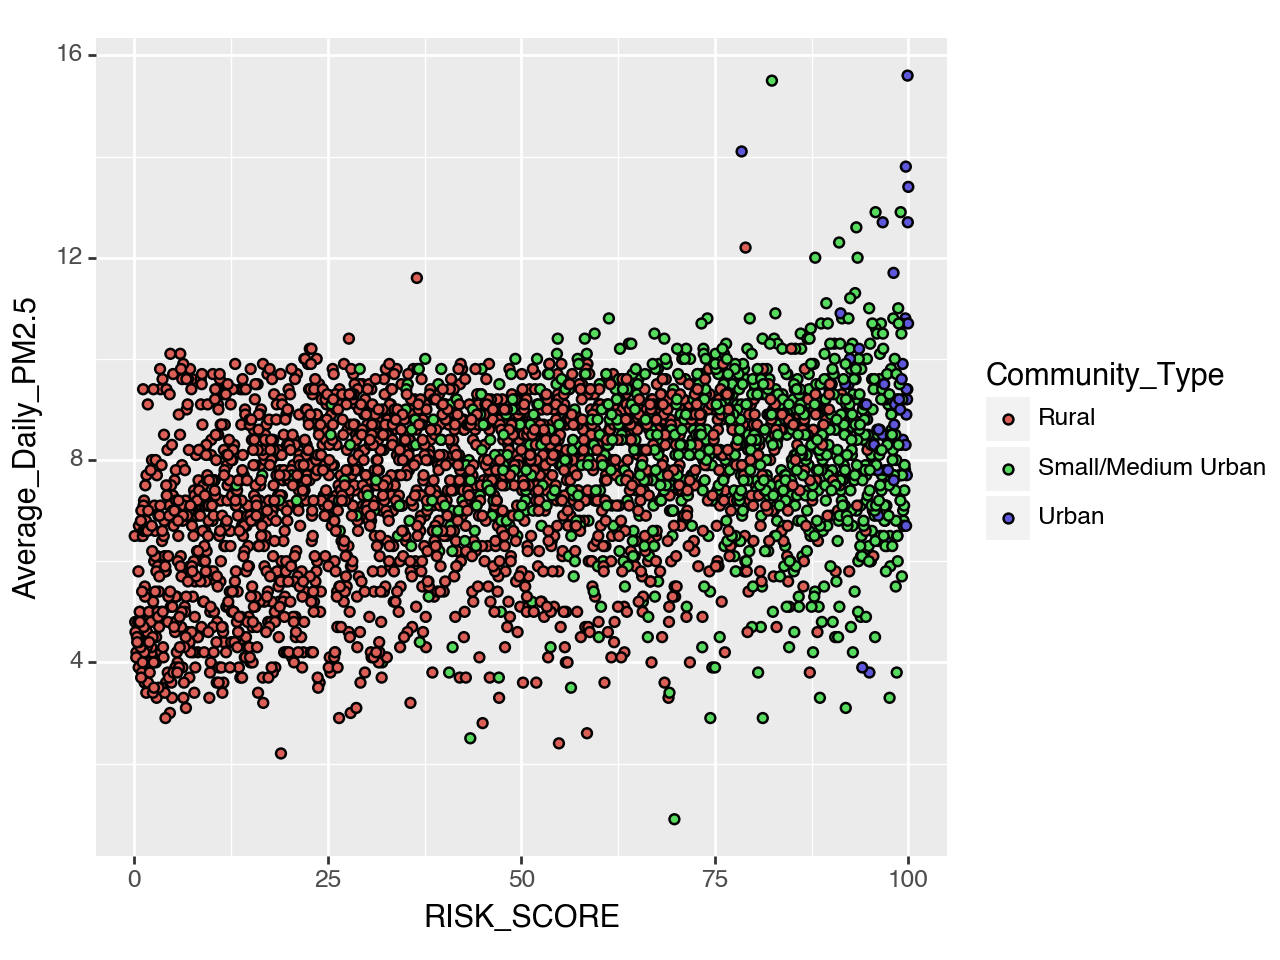

<Figure Size: (640 x 480)>

In [75]:
#air pollution particulate matter
(ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Average_Daily_PM2.5', fill = "Community_Type") 
 + geom_point())


/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 28 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 28 rows containing missing values.


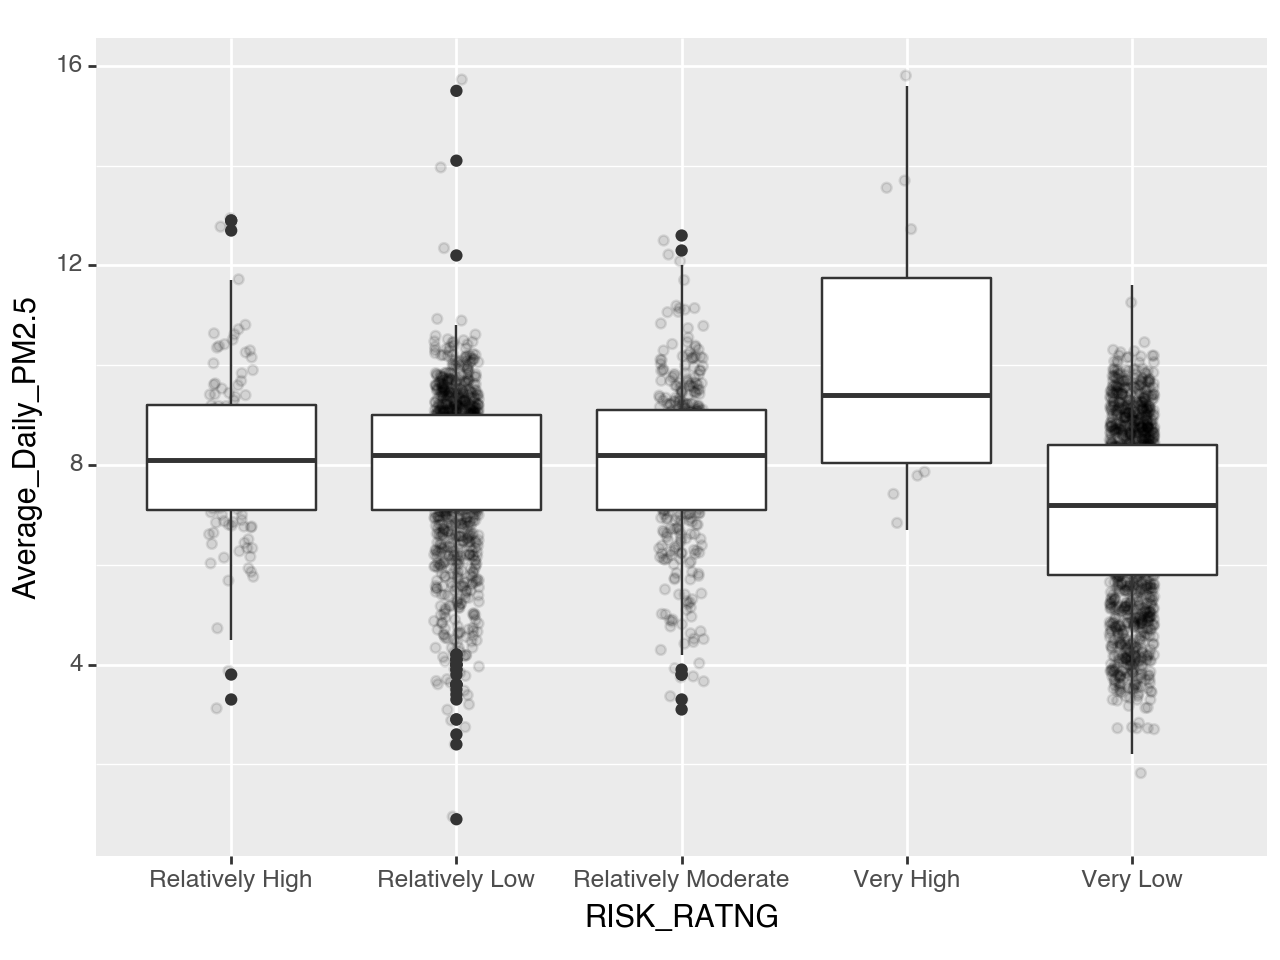

<Figure Size: (640 x 480)>

In [76]:
(ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_RATNG", y='Average_Daily_PM2.5') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot())

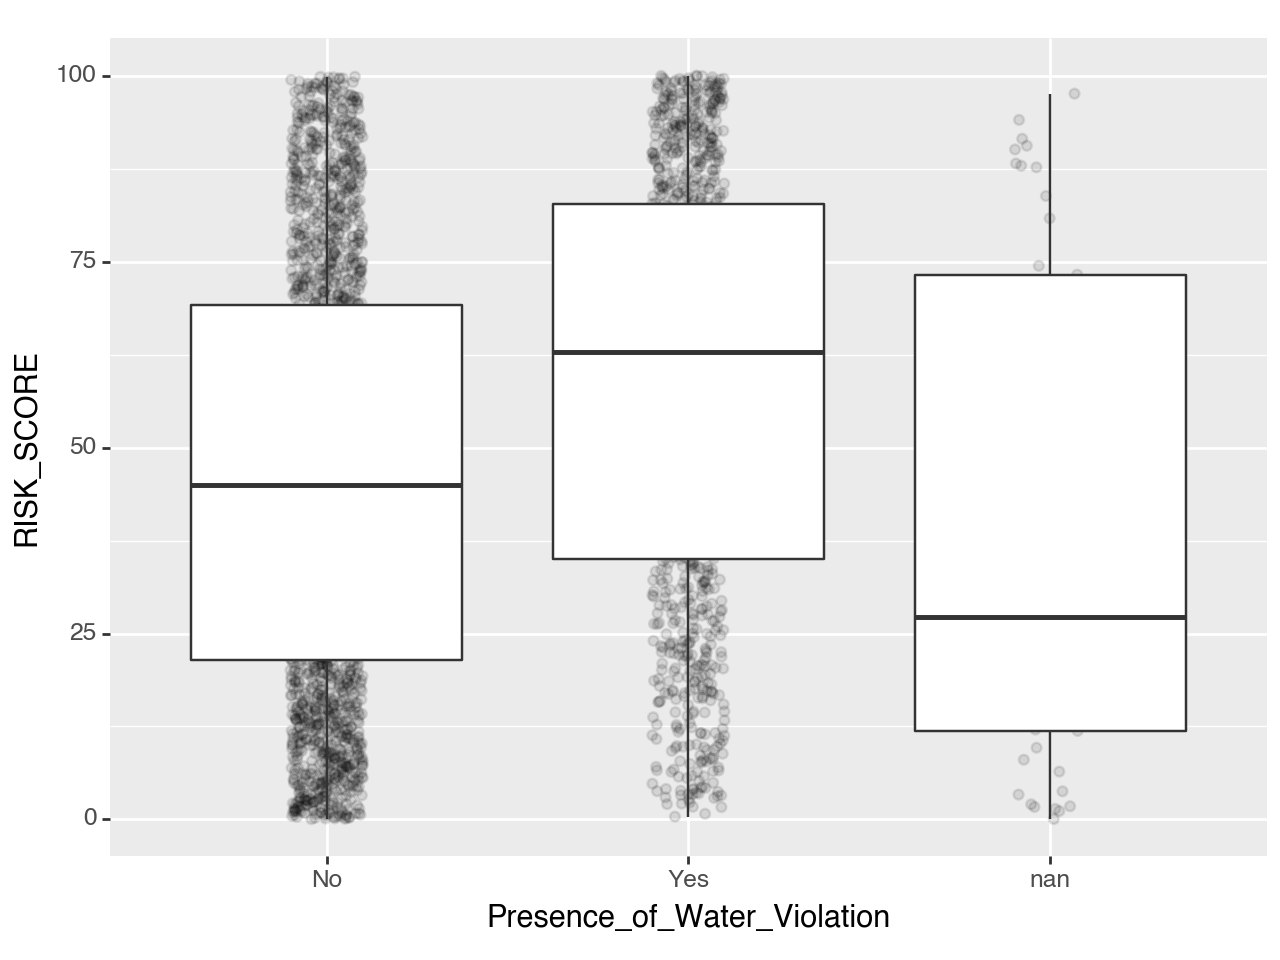

<Figure Size: (640 x 480)>

In [77]:
(ggplot(Merged_County_Data_clean) 
 + aes(y= "RISK_SCORE", x='Presence_of_Water_Violation') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot())

### Further Cleaning and Plotting

In [78]:
# create function to classify community type by population of county
# use 250,000 pop size for medium counties

def community_type_classification(population):
    '''
    Add description here.
    '''
    if population < 50000:
        return("Rural")
    elif population < 250000:
        return("Small/Medium Urban") # could maybe rename this? "Metro" or something?
    else:
        return("Urban")

In [93]:
# create new community type column with different parameters
Merged_County_Data_clean['Community_Type'] = [community_type_classification(x) for x in Merged_County_Data_clean['POPULATION']]

In [94]:
Merged_County_Data_clean.Community_Type.value_counts()

# the number of urban counties jumps from 50 to 279

Community_Type
Rural                 2154
Small/Medium Urban     712
Urban                  277
Name: count, dtype: int64

In [95]:
# create density column
Merged_County_Data_clean['Population_Density'] = Merged_County_Data_clean['POPULATION'] / Merged_County_Data_clean['AREA']

Merged_County_Data_clean.head()

FIPS STATEABBRV    State   County County_State      Community_Type  \
0  1001.0         AL  Alabama  Autauga  Autauga, AL  Small/Medium Urban   
1  1003.0         AL  Alabama  Baldwin  Baldwin, AL  Small/Medium Urban   
2  1005.0         AL  Alabama  Barbour  Barbour, AL               Rural   
3  1007.0         AL  Alabama     Bibb     Bibb, AL               Rural   
4  1009.0         AL  Alabama   Blount   Blount, AL  Small/Medium Urban   

   POPULATION  Population         AREA  Population_Density  ...  \
0     58764.0     59095.0   610.470508           96.260178  ...   
1    231365.0    239294.0  2047.738775          112.985603  ...   
2     25160.0     24964.0   913.646511           27.538003  ...   
3     22239.0     22477.0   632.486798           35.161208  ...   
4     58992.0     59041.0   657.196555           89.763100  ...   

   Percent_Frequent_Mental_Distress  Percent_Less_than_18_Years_of_Age  \
0                              16.2                          23.406380   
1                              16.1                          21.218250   
2                              18.0                          20.549591   
3                              17.4                          20.118343   
4                              17.4                          23.053471   

  Percent_65_and_Over  Percent_American_Indian_or_Alaska_Native Percent_Asian  \
0           16.048735                                  0.458584      1.203147   
1           21.469824                                  0.800271      1.122469   
2           19.976767                                  0.725044      0.460663   
3           16.737109                                  0.502736      0.275838   
4           18.725970                                  0.660558      0.403110   

   Percent_Native_Hawaiian_or_Other_Pacific_Islander Percent_Hispanic  \
0                                           0.118453         3.326847   
1                                           0.068535         4.841743   
2                                           0.232335         4.959141   
3                                           0.129021         3.087601   
4                                           0.123643         9.867719   

   Percent_Non-Hispanic_White Percent_Female                     Geolocation  
0                   72.454522      51.378289  POINT (-86.6464395 32.5322367)  
1                   83.148763      51.347715  POINT (-87.7460666 30.6592183)  
2                   45.305240      46.703253  POINT (-85.4051035 31.8702531)  
3                   73.564088      46.015927  POINT (-87.1271475 33.0158929)  
4                   86.329839      50.192239    POINT (-86.56644 33.9773575)  

[5 rows x 46 columns]

In [96]:
# filter out "Percent_Not_Proficient_in_English" - not needed for our analysis
del Merged_County_Data_clean['Percent_Not_Proficient_in_English']

# python didn't like df.drop 

Merged_County_Data_clean.head()


KeyError: 'Percent_Not_Proficient_in_English'

In [97]:
# Reorder columns

# Specify the desired column order
column_order = ['FIPS', 'STATEABBRV', 'State', 'County', 'County_State', 'Community_Type', 'POPULATION', 'Population', 
                'AREA',
                'Population_Density','Percent_Rural', 'RISK_SCORE', 'RISK_RATNG',
       'EAL_SCORE', 'EAL_RATNG', 'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE',
       'RESL_RATNG', 'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 
       'Life_Expectancy', 'Age-Adjusted_Death_Rate',
       'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress',
       'Percent_Less_than_18_Years_of_Age', 'Percent_65_and_Over',
       'Percent_American_Indian_or_Alaska_Native', 'Percent_Asian',
       'Percent_Native_Hawaiian_or_Other_Pacific_Islander', 'Percent_Hispanic',
       'Percent_Non-Hispanic_White', 'Percent_Female',
       'Geolocation']

# Reorder the columns in the original DataFrame
Merged_County_Data_clean = Merged_County_Data_clean[column_order]

# reordered dataframe
Merged_County_Data_clean.head()

# why are there two different population columns...?

FIPS STATEABBRV    State   County County_State      Community_Type  \
0  1001.0         AL  Alabama  Autauga  Autauga, AL  Small/Medium Urban   
1  1003.0         AL  Alabama  Baldwin  Baldwin, AL  Small/Medium Urban   
2  1005.0         AL  Alabama  Barbour  Barbour, AL               Rural   
3  1007.0         AL  Alabama     Bibb     Bibb, AL               Rural   
4  1009.0         AL  Alabama   Blount   Blount, AL  Small/Medium Urban   

   POPULATION  Population         AREA  Population_Density  ...  \
0     58764.0     59095.0   610.470508           96.260178  ...   
1    231365.0    239294.0  2047.738775          112.985603  ...   
2     25160.0     24964.0   913.646511           27.538003  ...   
3     22239.0     22477.0   632.486798           35.161208  ...   
4     58992.0     59041.0   657.196555           89.763100  ...   

   Percent_Frequent_Mental_Distress  Percent_Less_than_18_Years_of_Age  \
0                              16.2                          23.406380   
1                              16.1                          21.218250   
2                              18.0                          20.549591   
3                              17.4                          20.118343   
4                              17.4                          23.053471   

  Percent_65_and_Over  Percent_American_Indian_or_Alaska_Native Percent_Asian  \
0           16.048735                                  0.458584      1.203147   
1           21.469824                                  0.800271      1.122469   
2           19.976767                                  0.725044      0.460663   
3           16.737109                                  0.502736      0.275838   
4           18.725970                                  0.660558      0.403110   

   Percent_Native_Hawaiian_or_Other_Pacific_Islander Percent_Hispanic  \
0                                           0.118453         3.326847   
1                                           0.068535         4.841743   
2                                           0.232335         4.959141   
3                                           0.129021         3.087601   
4                                           0.123643         9.867719   

   Percent_Non-Hispanic_White Percent_Female                     Geolocation  
0                   72.454522      51.378289  POINT (-86.6464395 32.5322367)  
1                   83.148763      51.347715  POINT (-87.7460666 30.6592183)  
2                   45.305240      46.703253  POINT (-85.4051035 31.8702531)  
3                   73.564088      46.015927  POINT (-87.1271475 33.0158929)  
4                   86.329839      50.192239    POINT (-86.56644 33.9773575)  

[5 rows x 46 columns]

In [84]:
print(Merged_County_Data_clean.columns)

Index(['FIPS', 'STATEABBRV', 'State', 'County', 'County_State',
       'Community_Type', 'POPULATION', 'Population', 'AREA',
       'Population_Density', 'Percent_Rural', 'RISK_SCORE', 'RISK_RATNG',
       'EAL_SCORE', 'EAL_RATNG', 'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE',
       'RESL_RATNG', 'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 'Life_Expectancy',
       'Age-Adjusted_Death_Rate', 'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress', 'Percent_Less_than_18_Years_of_Age',
       'Percent_65_and_Over', 'Percent_American_Indian_or_Al

### Plotting Exploration with Density and Rural

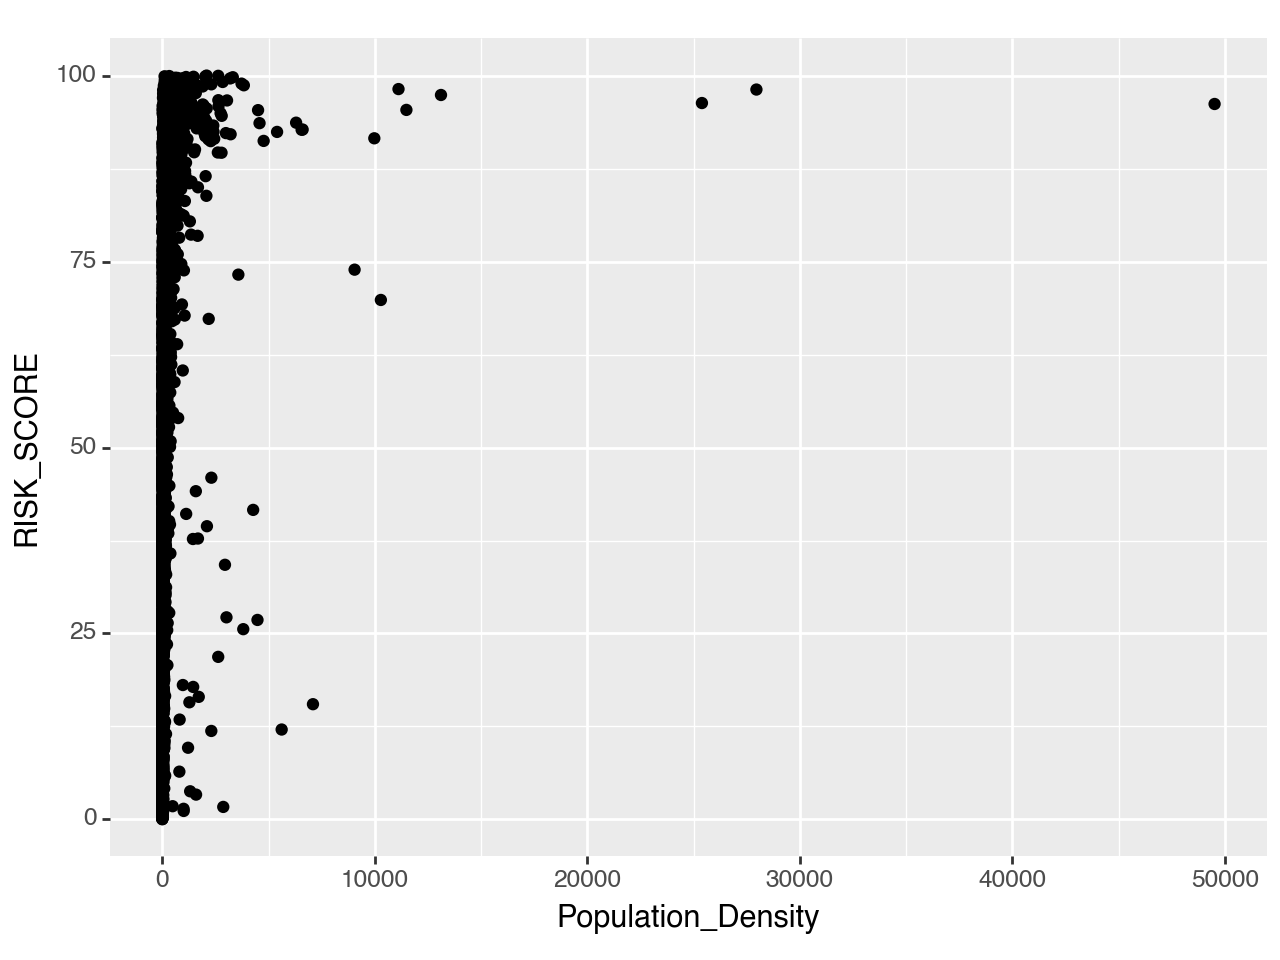

In [98]:
plot20 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Population_Density", y= "RISK_SCORE") 
 + geom_point())

print(plot20)

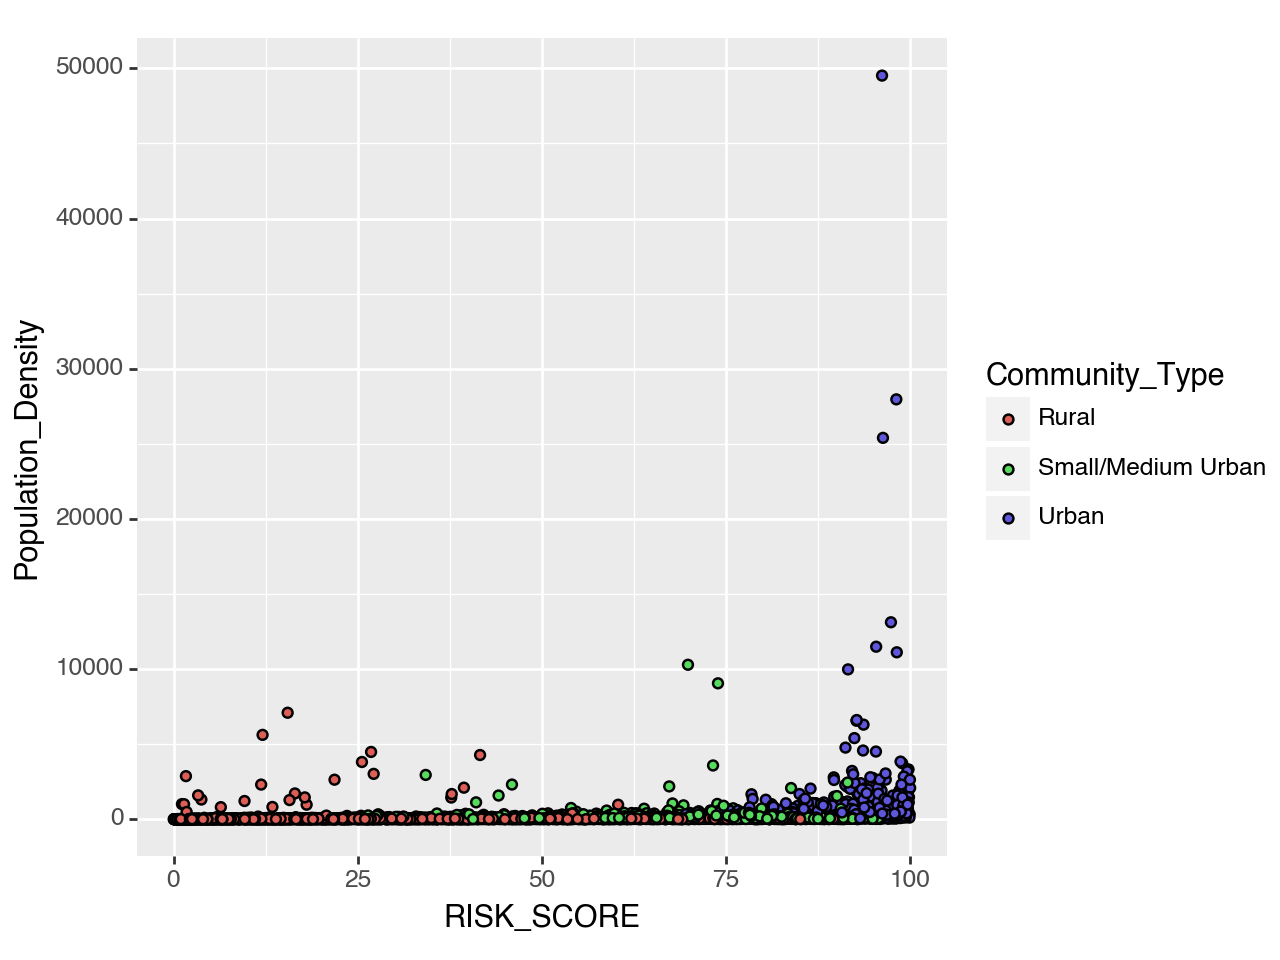

In [99]:
plot21 = (ggplot(Merged_County_Data_clean) 
 + aes(y= "Population_Density", x='RISK_SCORE', fill = "Community_Type") 
 + geom_point())

print(plot21)

In [87]:
# maybe we can filter some urban density outliers?

In [100]:
# just to see
no_density_outliers = Merged_County_Data_clean[Merged_County_Data_clean['Population_Density'] < 20000]

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


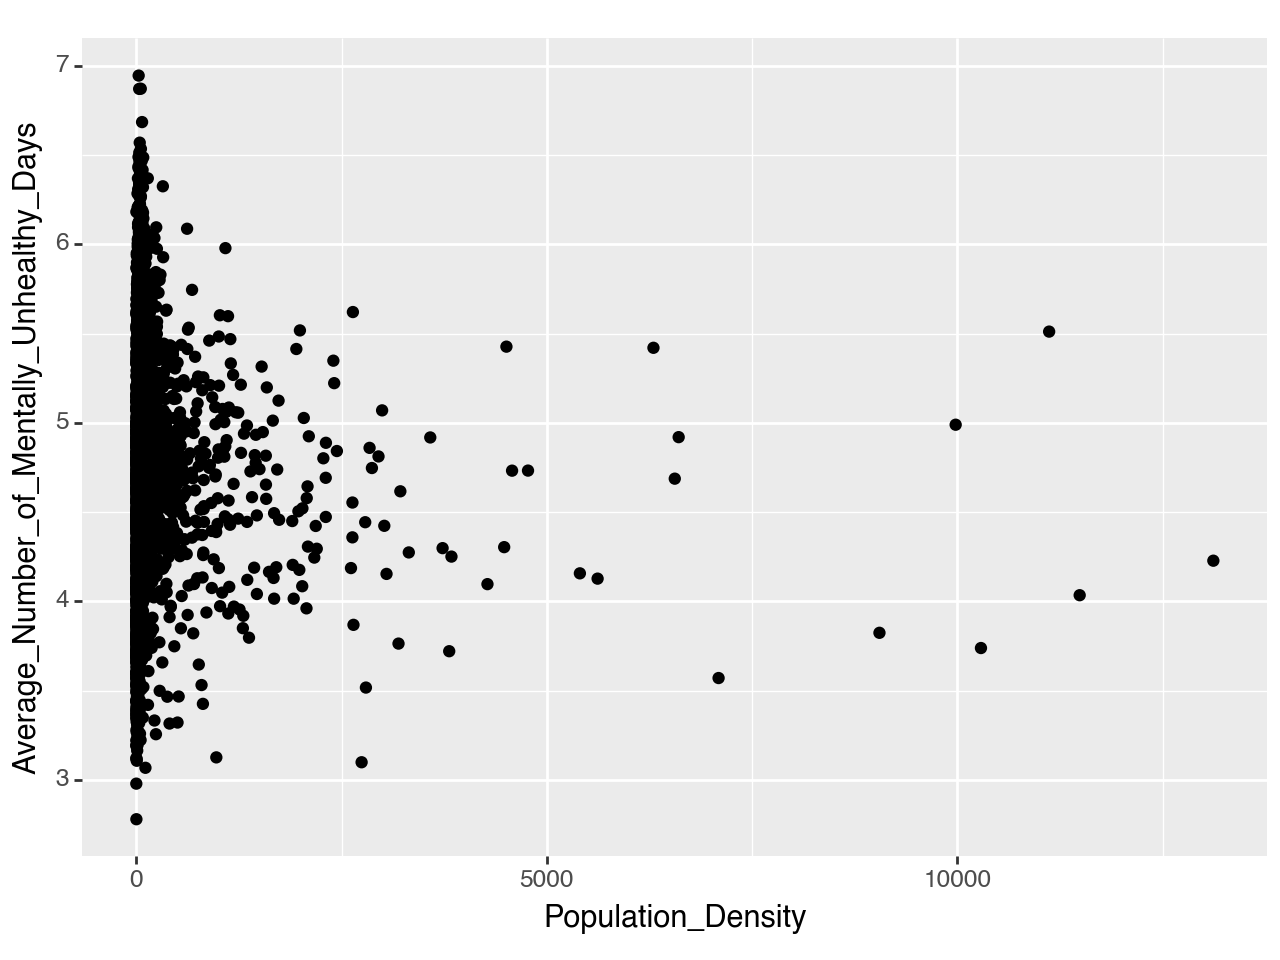

In [101]:
plot22 = (ggplot(no_density_outliers) 
 + aes(x= "Population_Density", y="Average_Number_of_Mentally_Unhealthy_Days") 
 + geom_point())

print(plot22)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 62 rows containing missing values.


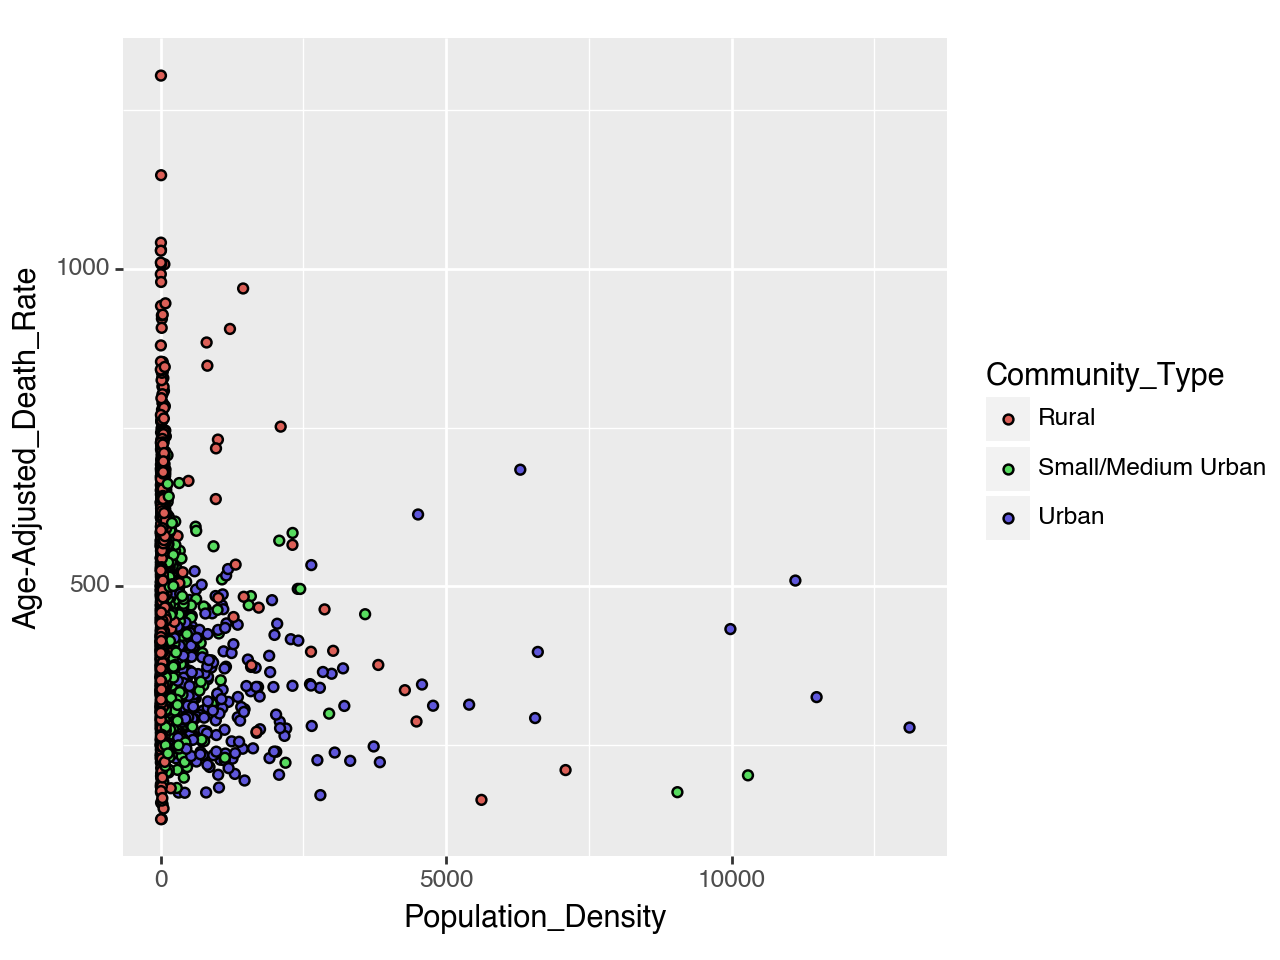

In [102]:
# without outliers

plot23 = (ggplot(no_density_outliers) 
 + aes(x= "Population_Density", y='Age-Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

print(plot23)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 62 rows containing missing values.


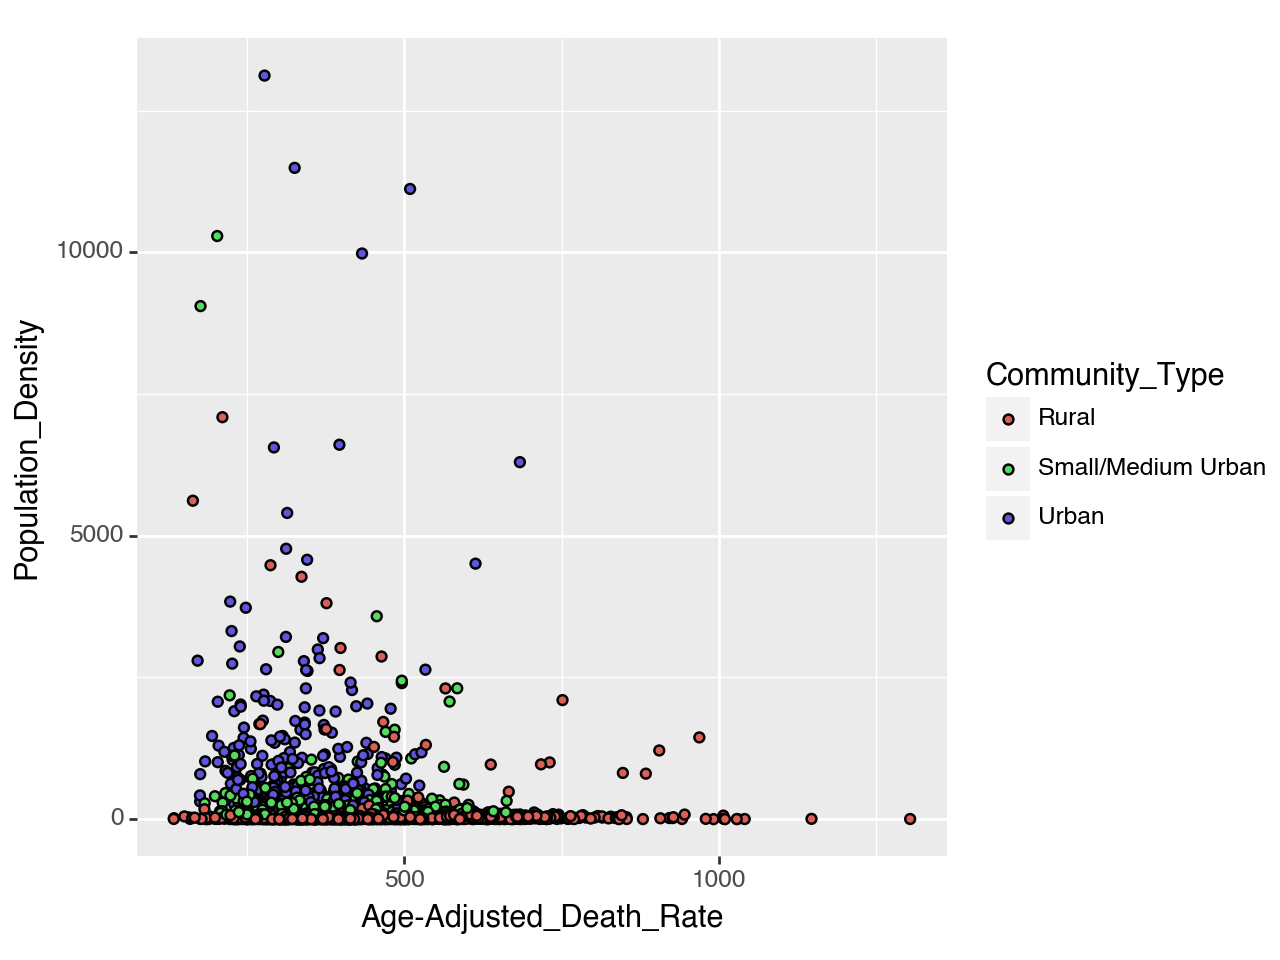

<Figure Size: (640 x 480)>

In [103]:
(ggplot(no_density_outliers) 
 + aes(y= "Population_Density", x='Age-Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

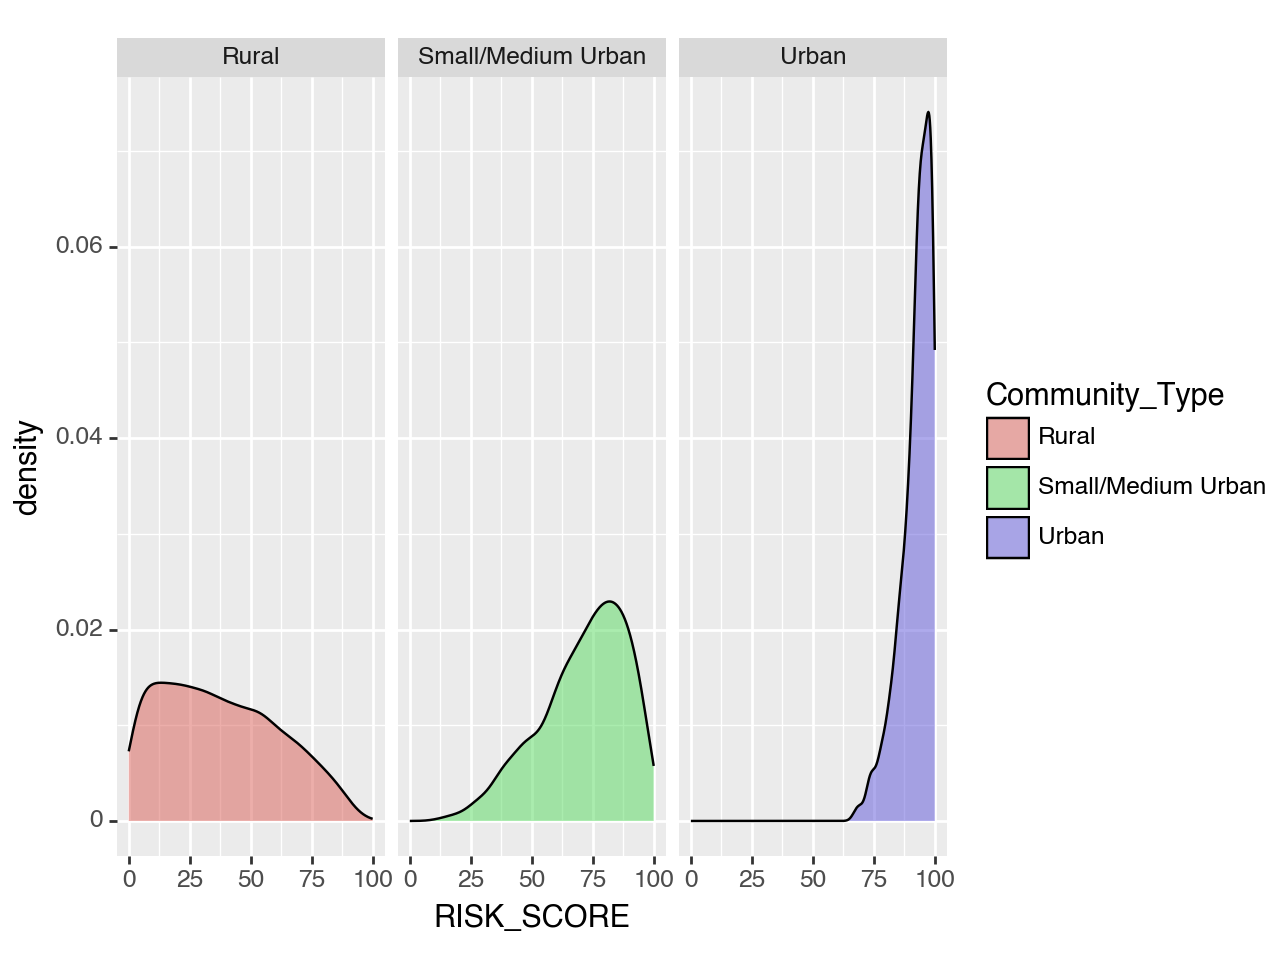

<Figure Size: (640 x 480)>

In [104]:
(ggplot(Merged_County_Data_clean, aes(x = 'RISK_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

In [105]:
# import library for models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [109]:
model_ols_r_bivariate = smf.ols(formula='Life_Expectancy ~ RISK_SCORE', data=Merged_County_Data_clean).fit()

print(model_ols_r_bivariate.summary())



                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.01
Date:                Thu, 16 Nov 2023   Prob (F-statistic):            0.00157
Time:                        15:12:57   Log-Likelihood:                -7986.7
No. Observations:                3071   AIC:                         1.598e+04
Df Residuals:                    3069   BIC:                         1.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.5603      0.121    632.298      0.0

In [110]:
model_ols_r_mv1 = smf.ols(formula='Life_Expectancy ~ RISK_SCORE + Population_Density', data=Merged_County_Data_clean).fit()


print(model_ols_r_mv1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     19.41
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           4.20e-09
Time:                        15:13:50   Log-Likelihood:                -7972.4
No. Observations:                3071   AIC:                         1.595e+04
Df Residuals:                    3068   BIC:                         1.597e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             76.6016      0

In [111]:
model_ols_r_mv2 = smf.ols(formula='Life_Expectancy ~ RISK_SCORE + Population_Density + Community_Type', data=Merged_County_Data_clean).fit()


print(model_ols_r_mv2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     60.02
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           7.16e-49
Time:                        15:14:42   Log-Likelihood:                -7875.9
No. Observations:                3071   AIC:                         1.576e+04
Df Residuals:                    3066   BIC:                         1.579e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [112]:
#comparing population vs population_density in model
model_ols_r_mv3 = smf.ols(formula='Life_Expectancy ~ RISK_SCORE + Population + Community_Type', data=Merged_County_Data_clean).fit()


print(model_ols_r_mv3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     60.92
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.38e-49
Time:                        15:19:34   Log-Likelihood:                -7874.3
No. Observations:                3071   AIC:                         1.576e+04
Df Residuals:                    3066   BIC:                         1.579e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [113]:
model_ols_r_mv4 = smf.ols(formula='Life_Expectancy ~ RISK_SCORE + Population_Density + Community_Type + Percent_65_and_Over', data=Merged_County_Data_clean).fit()


print(model_ols_r_mv4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     64.81
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.74e-64
Time:                        15:24:31   Log-Likelihood:                -7837.4
No. Observations:                3071   AIC:                         1.569e+04
Df Residuals:                    3065   BIC:                         1.572e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
